<div style="background-color:#e68867; padding:10px; border:2px solid black;">
    <h1><b>Quality | Ethics | Transparency</b></h1>
</div>

<div style="background-color:#c7cbe9; padding:10px;border:2px solid black;">
<h2>📌 [AquaMetrics: Analysis Operational Performance & Revenue]</h2>
    
🔹 **Author** : MagaliTrueAnalytics  
🔹 **Date** : 2025-04-20 
🔹 **Sources** : [Dataset](https://github.com/MagaliTrueAnalytics/Portfolio/blob/main/Projet3/Data/environmental_dataset.csv)  
🔹 **Objective** : The objective of analyzing this dataset is to **assess the operational performance** of an environmental analysis laboratory by **cleaning and structuring imperfect data**, identifying revenue trends, and measuring **analysis efficiency through sample processing times**.
</div>

<div style="background-color:#c7cbe9; padding:10px;border:2px solid black;">
    
<h2>📈 Dataset Overview</h2>
 
This dataset simulates the operations of an **environmental analysis laboratory** specializing in 🚰**water quality testing**, inspired by real lab services. It represents **Certificates of Analysis (CofA)** issued for water samples, tracking the process from **sample reception to final certification**. The dataset was generated using **Grok**, an AI by **xAI**, incorporating **realistic test names, structured imperfections**, and ensuring alignment with environmental lab operations.  

#### **Dataset Structure**  
- **1000+ rows** including duplicates.  
- Key columns:  
  - **Request_ID** (unique identifier)  
  - **Sample_Received_Date** (start of the analysis)  
  - **Number_of_Tests** (1–10 tests per sample)  
  - **Test_Type** (Chemistry or Microbiology)  
  - **Test_Names** (e.g., pH, Heavy Metals, E. coli)  
  - **Final_CofA_Date** (completion of analysis)  
  - **Revenue** (calculated based on tests, price range **80–$300 USD**)  
- **Data range:** January 1, 2023 – April 19, 2025  
- **Turnaround time:** 3–30 days between sample reception and CofA issuance.  

#### **Data Challenges**  
To reflect **real-world imperfections**, the dataset includes:  
- **Missing values** (~5%) in Final_CofA_Date, Revenue, or Test_Names.  
- **Duplicate entries** (~2%) simulating data entry errors.  
- **Inconsistent date formats** (~3%) (e.g., DD-MM-YYYY, YYYY/MM/DD).  
- **Revenue outliers** (~2%) (e.g.,10 or $5000).  
- **Typographical errors** (~1%) in Test_Type (e.g., "**Chemisty**", "**Microbio**").  

#### **Purpose & Use Cases**  
This dataset is ideal for **data wrangling, cleaning, and exploratory analysis**, helping to:  
- Standardize date formats and test categories.  
- Handle missing values and eliminate duplicates.  
- Detect and address outliers in revenue data.  
- Analyze trends in **processing time and revenue by test type**.  
- Visualize test distribution and pricing patterns.
</div>

<div style="background-color:#c7cbe9; padding:10px;border:2px solid black;">
    
<h2>🔎Methodology</h2>
</div>

✅**Import libraries**

In [ ]:
# Execture this code only if required by your environment
!pip install pandas numpy matplotlib

In [2]:
import pandas as pd       
import numpy as np        
import matplotlib.pyplot as plt    

Matplotlib is building the font cache; this may take a moment.


✅**Load dataset**

In [3]:
import requests

url = "https://raw.githubusercontent.com/MagaliTrueAnalytics/Portfolio/main/Projet3/Data/environmental_dataset.csv"

# Download file
response = requests.get(url)
if response.status_code == 200:
    with open("environmental_dataset.csv", "wb") as file:
        file.write(response.content)

    # Load into a df
    df = pd.read_csv("environmental_dataset.csv")
    print(df.head())
else:
    print("Error: Unable to access the file.")

                             Request_ID Sample_Received_Date  Number_of_Tests  \
0  33b1ff8d-a70e-4b58-a8e7-8d27685c32f0           01/12/2024                2   
1  7cffd9e9-9b9f-4d80-aadd-a71eefc8362f           10/11/2024                4   
2  5190c8b5-5365-4358-ba5b-27db933d0db0           07/10/2023                4   
3  452e54a6-6282-4c65-960d-c5e5275a7f6f           02/08/2023                6   
4  3f168fdb-c0bd-4ee3-979e-7430c5304f40           11/10/2023                7   

      Test_Type                                         Test_Names  \
0     Chemistry                            Heavy Metals, Turbidity   
1  Microbiology  Total Coliforms, Cryptosporidium, Giardia, Pse...   
2     Chemistry            Alkalinity, Nitrate, Sulfate, Phosphate   
3  Microbiology  Clostridium perfringens, Cryptosporidium, Hete...   
4     Chemistry  pH, TOC, Sulfate, Heavy Metals, Nitrate, Alkal...   

  Final_CofA_Date  Revenue  
0      02/03/2024   316.97  
1      11/04/2024   729.00  
2    

In [4]:
df.head()

,Request_ID,Sample_Received_Date,Number_of_Tests,Test_Type,Test_Names,Final_CofA_Date,Revenue
0,33b1ff8d-a70e-4b58-a8e7-8d27685c32f0,01/12/2024,2,Chemistry,"Heavy Metals, Turbidity",02/03/2024,316.97
1,7cffd9e9-9b9f-4d80-aadd-a71eefc8362f,10/11/2024,4,Microbiology,"Total Coliforms, Cryptosporidium, Giardia, Pse...",11/04/2024,729.00
2,5190c8b5-5365-4358-ba5b-27db933d0db0,07/10/2023,4,Chemistry,"Alkalinity, Nitrate, Sulfate, Phosphate",07/25/2023,789.20
3,452e54a6-6282-4c65-960d-c5e5275a7f6f,02/08/2023,6,Microbiology,"Clostridium perfringens, Cryptosporidium, Hete...",NaN,1344.81
4,3f168fdb-c0bd-4ee3-979e-7430c5304f40,11/10/2023,7,Chemistry,"pH, TOC, Sulfate, Heavy Metals, Nitrate, Alkal...",NaN,1323.30


In [5]:
df.shape

(1020, 7)

✅**Data Quality Inspection & Data Wrangling**

>➡️**Typographical errors**

Strategy : check the unique entry for each relevant column

In [7]:
df['Test_Type'].unique()

array(['Chemistry', 'Microbiology', 'MICROBIOLOGY', 'Chemisty',
       'chemistry', 'Microbio'], dtype=object)

In [8]:
df['Test_Type']=df['Test_Type'].replace({'chemistry':'Chemistry','MICROBIOLOGY':'Microbiology','Chemisty':'Chemistry','Microbio':'Microbiology'})

In [9]:
df['Test_Type'].unique()

array(['Chemistry', 'Microbiology'], dtype=object)

In [10]:
df['Test_Names'].str.split(", ").explode().unique()

array(['Heavy Metals', 'Turbidity', 'Total Coliforms', 'Cryptosporidium',
       'Giardia', 'Pseudomonas aeruginosa', 'Alkalinity', 'Nitrate',
       'Sulfate', 'Phosphate', 'Clostridium perfringens',
       'Heterotrophic Plate Count', 'Fecal Streptococci', 'Legionella',
       'pH', 'TOC', 'Hardness', 'Chloride', 'Enterococci', 'E. coli', nan],
      dtype=object)

>➡️**Duplicates**

In [11]:
df[df.duplicated]

,Request_ID,Sample_Received_Date,Number_of_Tests,Test_Type,Test_Names,Final_CofA_Date,Revenue
1000,26516224-8dbc-44dc-98e4-ee0ef049a3b5,12/15/2024,2,Microbiology,"Enterococci, Heterotrophic Plate Count",12/22/2024,595.33
1001,985acae8-bdcb-4086-be35-3b581f2b4880,05/29/2024,3,Chemistry,"Alkalinity, Hardness, Turbidity",06/10/2024,852.76
1002,361a07ea-8804-4400-8a5e-41784cefbdea,01/21/2023,8,Microbiology,NaN,01/27/2023,1921.22
1003,9458012f-ca24-4f5a-a388-618dcc90eeed,13-04-2025,2,Chemistry,"Sulfate, Nitrate",05/12/2025,304.65
1004,abfce290-2be8-4001-9820-48050cdfc860,09/03/2024,4,Microbiology,"Heterotrophic Plate Count, E. coli, Enterococc...",09/08/2024,644.34
1005,159455ac-bcdd-4068-aa3a-94131f10d981,02/16/2024,10,Chemistry,"Alkalinity, Nitrate, Phosphate, pH, Heavy Meta...",03/04/2024,2602.54
1006,3736485b-6447-4ed1-8895-ea3cb9f14cc8,07/09/2023,6,Chemistry,NaN,08/07/2023,1661.27
1007,8ccb9359-1c78-4bd2-8ac2-7caaf724f2d1,10/13/2024,10,Microbiology,"Pseudomonas aeruginosa, Enterococci, Total Col...",10/30/2024,2991.23
1008,a9e7f526-dc5d-4413-91ad-38d5db31acfa,03/22/2025,7,Microbiology,"Pseudomonas aeruginosa, Cryptosporidium, E. co...",04/21/2025,1678.93
1009,088e33a3-c4b9-4c91-86e5-620b82c64a4f,01/12/2024,4,Microbiology,"Fecal Streptococci, Enterococci, Cryptosporidi...",01/31/2024,NaN


In [12]:
df[df.duplicated(keep=False)]

,Request_ID,Sample_Received_Date,Number_of_Tests,Test_Type,Test_Names,Final_CofA_Date,Revenue
77,7c3c31aa-1d69-4499-abbb-90f8bb5b3e35,08/06/2024,3,Chemistry,"Sulfate, Nitrate, Hardness",08/18/2024,886.89
215,36c0ab10-a2d9-4a4b-acff-f0f2d801aebc,02/13/2025,6,Chemistry,"Heavy Metals, Hardness, TOC, Phosphate, Alkali...",03/01/2025,10000.00
216,3736485b-6447-4ed1-8895-ea3cb9f14cc8,07/09/2023,6,Chemistry,NaN,08/07/2023,1661.27
260,9dab98aa-093e-4e0f-b1c1-d4368d3e6c02,09/25/2024,7,Microbiology,"E. coli, Legionella, Cryptosporidium, Fecal St...",10/16/2024,1525.55
301,361a07ea-8804-4400-8a5e-41784cefbdea,01/21/2023,8,Microbiology,NaN,01/27/2023,1921.22
421,26516224-8dbc-44dc-98e4-ee0ef049a3b5,12/15/2024,2,Microbiology,"Enterococci, Heterotrophic Plate Count",12/22/2024,595.33
434,9458012f-ca24-4f5a-a388-618dcc90eeed,13-04-2025,2,Chemistry,"Sulfate, Nitrate",05/12/2025,304.65
495,a9e7f526-dc5d-4413-91ad-38d5db31acfa,03/22/2025,7,Microbiology,"Pseudomonas aeruginosa, Cryptosporidium, E. co...",04/21/2025,1678.93
664,c1afa0e4-9de9-4831-8fc7-18d5c1f9474a,09.28.2024,6,Microbiology,"Fecal Streptococci, Clostridium perfringens, G...",10/16/2024,650.07
671,bd03370f-f8fa-42c9-a71a-7e99b316bce3,06/12/2023,10,Chemistry,"Chloride, Heavy Metals, Sulfate, TOC, Turbidit...",07/03/2023,1023.37


In [13]:
df = df.drop_duplicates()

In [14]:
df.shape

(1000, 7)

>➡️**Data type**

In [15]:
df.dtypes

Request_ID               object
Sample_Received_Date     object
Number_of_Tests           int64
Test_Type                object
Test_Names               object
Final_CofA_Date          object
Revenue                 float64
dtype: object

💡**Strategy for handling data type for Date:** 

- Identify typo and string discrepancies in format such separator, Date should be MM/DD/YYYY to be processed
- Formate date starting with YYYY
- Formate date starting with DD
- Check for coherence between 'Sample_Received_Date' and 'Final_CofA_Date' throughout cleaning process
- Start with 'Sample_Received_Date' and apply the same process to 'Final_CofA_Date'
- Convert dates into datetime format
- Check any remaining ambiguity at the end of the process (Final_CofA_Date must be >= 'Sample_Received_Date'

In [16]:
df['Sample_Received_Date'].unique()

array(['01/12/2024', '10/11/2024', '07/10/2023', '02/08/2023',
       '11/10/2023', '02/10/2023', '01/23/2025', '04/20/2024',
       '04/24/2024', '08/17/2023', '04/15/2025', '12/25/2023',
       '03/22/2024', '10/10/2023', '03/16/2024', '12/29/2023',
       '10/04/2024', '04/14/2025', '02/18/2025', '02/14/2024',
       '03/08/2023', '08/04/2023', '03/15/2024', '2024/10/30',
       '01.30.2024', '03/08/2024', '05/04/2024', '09/26/2023',
       '01/11/2023', '07/12/2024', '03/09/2024', '02/17/2025',
       '01/19/2025', '11/12/2023', '05/25/2023', '12/02/2023',
       '06/22/2023', '12/15/2024', '05/11/2024', '06/11/2024',
       '09/23/2024', '03/21/2023', '09/06/2024', '03/27/2024',
       '01/07/2025', '05/16/2024', '10/05/2024', '01/04/2025',
       '07/27/2023', '01/28/2023', '04/09/2023', '10/24/2023',
       '01/27/2024', '04/11/2024', '06/01/2023', '01/09/2025',
       '03/31/2023', '01/24/2024', '11/18/2023', '09/01/2024',
       '02/09/2023', '08/23/2023', '10/06/2024', '11/19

In [17]:
#replace '.' and '-' by '/' in Sample_Received_Date
df['Sample_Received_Date']=df['Sample_Received_Date'].str.replace('.','/')
df['Sample_Received_Date']=df['Sample_Received_Date'].str.replace('-','/')

In [18]:
df['Sample_Received_Date'].unique()

array(['01/12/2024', '10/11/2024', '07/10/2023', '02/08/2023',
       '11/10/2023', '02/10/2023', '01/23/2025', '04/20/2024',
       '04/24/2024', '08/17/2023', '04/15/2025', '12/25/2023',
       '03/22/2024', '10/10/2023', '03/16/2024', '12/29/2023',
       '10/04/2024', '04/14/2025', '02/18/2025', '02/14/2024',
       '03/08/2023', '08/04/2023', '03/15/2024', '2024/10/30',
       '01/30/2024', '03/08/2024', '05/04/2024', '09/26/2023',
       '01/11/2023', '07/12/2024', '03/09/2024', '02/17/2025',
       '01/19/2025', '11/12/2023', '05/25/2023', '12/02/2023',
       '06/22/2023', '12/15/2024', '05/11/2024', '06/11/2024',
       '09/23/2024', '03/21/2023', '09/06/2024', '03/27/2024',
       '01/07/2025', '05/16/2024', '10/05/2024', '01/04/2025',
       '07/27/2023', '01/28/2023', '04/09/2023', '10/24/2023',
       '01/27/2024', '04/11/2024', '06/01/2023', '01/09/2025',
       '03/31/2023', '01/24/2024', '11/18/2023', '09/01/2024',
       '02/09/2023', '08/23/2023', '10/06/2024', '11/19

In [19]:
####order date MM/DD/YYYY
#find date beginning with YYYY (check vs 'Final_CofA_Date')
#Filter date beginning with '202'
filtered_df = df[df['Sample_Received_Date'].str.startswith('202')]
print(filtered_df)

                               Request_ID Sample_Received_Date  \
23   e1e6e92b-d0e8-4bcb-86ee-918d9e5691b4           2024/10/30   
147  94f345fd-713e-437c-9379-097e7359f5c4           2024/12/05   
525  f736af50-c848-43bc-96d7-13cbace115c8           2023/10/27   
528  64b321dc-fb1c-4ab5-a871-f7019dc81db3           2023/11/15   

     Number_of_Tests     Test_Type  \
23                 7  Microbiology   
147                3     Chemistry   
525                4  Microbiology   
528                4     Chemistry   

                                            Test_Names Final_CofA_Date  \
23   Cryptosporidium, Enterococci, Heterotrophic Pl...      2024/11/03   
147                      Phosphate, Hardness, Chloride      12/14/2024   
525  Cryptosporidium, Legionella, E. coli, Pseudomo...      11/25/2023   
528              pH, Heavy Metals, Nitrate, Alkalinity      11/24/2023   

     Revenue  
23   1571.03  
147   546.44  
525  1186.12  
528   571.98  


In [20]:
####cleaning 'Sample_Received_Date' starting with YYYYY####
# Step 1: Identify YYYY/MM/DD dates in Sample_Received_Date
sample_yyyy_mask = df['Sample_Received_Date'].str.startswith('202', na=False)
sample_yyyy_dates = df[sample_yyyy_mask].copy()

# Step 2: Extract YYYY, MM, DD and reformat to MM/DD/YYYY
if not sample_yyyy_dates.empty:
    # Split the date into components
    date_components = sample_yyyy_dates['Sample_Received_Date'].str.split('/', expand=True)
    # Reformat as MM/DD/YYYY
    sample_yyyy_dates['Sample_Received_Date'] = date_components[1] + '/' + date_components[2] + '/' + date_components[0]
    # Update the original DataFrame
    df.loc[sample_yyyy_mask, 'Sample_Received_Date'] = sample_yyyy_dates['Sample_Received_Date']

# Step 3: Verify the changes
print("Reformatted Sample_Received_Date (YYYY/MM/DD to MM/DD/YYYY):")
print(df[sample_yyyy_mask][['Sample_Received_Date', 'Final_CofA_Date']])
print("\nUnique Sample_Received_Date formats after reformat:")
print(df['Sample_Received_Date'].unique())

Reformatted Sample_Received_Date (YYYY/MM/DD to MM/DD/YYYY):
    Sample_Received_Date Final_CofA_Date
23            10/30/2024      2024/11/03
147           12/05/2024      12/14/2024
525           10/27/2023      11/25/2023
528           11/15/2023      11/24/2023

Unique Sample_Received_Date formats after reformat:
['01/12/2024' '10/11/2024' '07/10/2023' '02/08/2023' '11/10/2023'
 '02/10/2023' '01/23/2025' '04/20/2024' '04/24/2024' '08/17/2023'
 '04/15/2025' '12/25/2023' '03/22/2024' '10/10/2023' '03/16/2024'
 '12/29/2023' '10/04/2024' '04/14/2025' '02/18/2025' '02/14/2024'
 '03/08/2023' '08/04/2023' '03/15/2024' '10/30/2024' '01/30/2024'
 '03/08/2024' '05/04/2024' '09/26/2023' '01/11/2023' '07/12/2024'
 '03/09/2024' '02/17/2025' '01/19/2025' '11/12/2023' '05/25/2023'
 '12/02/2023' '06/22/2023' '12/15/2024' '05/11/2024' '06/11/2024'
 '09/23/2024' '03/21/2023' '09/06/2024' '03/27/2024' '01/07/2025'
 '05/16/2024' '10/05/2024' '01/04/2025' '07/27/2023' '01/28/2023'
 '04/09/2023' '10/24/

In [21]:
#order date MM/DD/YYYY
#find date beginning with number > 12 ((check vs 'Final_CofA_Date') DD/MM/YYYY
# Display rows where Sample_Received_Date starts with a number >12
print(df[pd.to_numeric(df['Sample_Received_Date'].str.split('/').str[0], errors='coerce') > 12][['Sample_Received_Date', 'Final_CofA_Date']].dropna(subset=['Sample_Received_Date']))


    Sample_Received_Date Final_CofA_Date
188           13/08/2023      09/02/2023
321           27/02/2024      03/22/2024
426           17/02/2023      03/19/2023
434           13/04/2025      05/12/2025
498           14/12/2024      12/26/2024
508           20/12/2024      01/18/2025
598           15/11/2023      12/15/2023
913           21/02/2025      03/20/2025


In [22]:
####cleaning 'Sample_Received_Date' starting with DD####
# Step 1: Identify DD-MM-YYYY dates where the first number (day) is >12
# Extract the first component (before the first '/')
first_component = df['Sample_Received_Date'].str.split('/').str[0]
# Convert to numeric, ignoring NaN and non-numeric values
first_component_numeric = pd.to_numeric(first_component, errors='coerce')
# Create a mask for dates where the first number is >12 (and not NaN)
dd_mm_yyyy_mask = (first_component_numeric > 12) & (df['Sample_Received_Date'].notna())

# Filter the DataFrame
dd_mm_yyyy_dates = df[dd_mm_yyyy_mask].copy()

# Step 2: Extract DD, MM, YYYY and reformat to MM/DD/YYYY
if not dd_mm_yyyy_dates.empty:
    # Split the date into components
    date_components = dd_mm_yyyy_dates['Sample_Received_Date'].str.split('/', expand=True)
    # Reformat as MM/DD/YYYY (swap day and month)
    dd_mm_yyyy_dates['Sample_Received_Date'] = date_components[1] + '/' + date_components[0] + '/' + date_components[2]
    # Update the original DataFrame
    df.loc[dd_mm_yyyy_mask, 'Sample_Received_Date'] = dd_mm_yyyy_dates['Sample_Received_Date']

# Step 3: Verify the changes
print("Reformatted Sample_Received_Date (DD-MM-YYYY to MM/DD/YYYY, first number >12):")
print(df[dd_mm_yyyy_mask][['Sample_Received_Date', 'Final_CofA_Date']])
print("\nUnique Sample_Received_Date formats after reformat:")
print(df['Sample_Received_Date'].unique())

Reformatted Sample_Received_Date (DD-MM-YYYY to MM/DD/YYYY, first number >12):
    Sample_Received_Date Final_CofA_Date
188           08/13/2023      09/02/2023
321           02/27/2024      03/22/2024
426           02/17/2023      03/19/2023
434           04/13/2025      05/12/2025
498           12/14/2024      12/26/2024
508           12/20/2024      01/18/2025
598           11/15/2023      12/15/2023
913           02/21/2025      03/20/2025

Unique Sample_Received_Date formats after reformat:
['01/12/2024' '10/11/2024' '07/10/2023' '02/08/2023' '11/10/2023'
 '02/10/2023' '01/23/2025' '04/20/2024' '04/24/2024' '08/17/2023'
 '04/15/2025' '12/25/2023' '03/22/2024' '10/10/2023' '03/16/2024'
 '12/29/2023' '10/04/2024' '04/14/2025' '02/18/2025' '02/14/2024'
 '03/08/2023' '08/04/2023' '03/15/2024' '10/30/2024' '01/30/2024'
 '03/08/2024' '05/04/2024' '09/26/2023' '01/11/2023' '07/12/2024'
 '03/09/2024' '02/17/2025' '01/19/2025' '11/12/2023' '05/25/2023'
 '12/02/2023' '06/22/2023' '12/15/202

In [23]:
df['Final_CofA_Date'].unique()

array(['02/03/2024', '11/04/2024', '07/25/2023', nan, '03/05/2023',
       '01/27/2025', '05/05/2024', '05/22/2024', '09/13/2023',
       '05/01/2025', '01/22/2024', '04/05/2024', '11/01/2023',
       '03/30/2024', '01/01/2024', '10/12/2024', '05.02.2025',
       '2025/02/25', '02/20/2024', '03/24/2023', '08/12/2023',
       '03/31/2024', '2024/11/03', '02/14/2024', '04/07/2024',
       '05/21/2024', '10/23/2023', '01/31/2023', '07/29/2024',
       '03/13/2024', '03/09/2025', '02/16/2025', '11/20/2023',
       '06/03/2023', '07/06/2023', '12/19/2024', '07/02/2024',
       '04/21/2025', '10/16/2024', '04/19/2023', '09/29/2024',
       '06/02/2024', '05/28/2024', '10/14/2024', '01/13/2025',
       '07.30.2023', '02/03/2023', '04/17/2023', '11/09/2023',
       '02/01/2024', '03/28/2024', '04/30/2024', '06/18/2023',
       '04/15/2023', '11/25/2023', '09/07/2024', '03/07/2023',
       '09/02/2023', '03/14/2024', '10/17/2024', '11/24/2024',
       '08/28/2023', '02/12/2024', '03/19/2023', '

In [24]:
#replace '.' and '-' by '/' in Final_CofA_Date
df['Final_CofA_Date']=df['Final_CofA_Date'].str.replace('.','/')
df['Final_CofA_Date']=df['Final_CofA_Date'].str.replace('-','/')

In [25]:
df['Final_CofA_Date'].unique()

array(['02/03/2024', '11/04/2024', '07/25/2023', nan, '03/05/2023',
       '01/27/2025', '05/05/2024', '05/22/2024', '09/13/2023',
       '05/01/2025', '01/22/2024', '04/05/2024', '11/01/2023',
       '03/30/2024', '01/01/2024', '10/12/2024', '05/02/2025',
       '2025/02/25', '02/20/2024', '03/24/2023', '08/12/2023',
       '03/31/2024', '2024/11/03', '02/14/2024', '04/07/2024',
       '05/21/2024', '10/23/2023', '01/31/2023', '07/29/2024',
       '03/13/2024', '03/09/2025', '02/16/2025', '11/20/2023',
       '06/03/2023', '07/06/2023', '12/19/2024', '07/02/2024',
       '04/21/2025', '10/16/2024', '04/19/2023', '09/29/2024',
       '06/02/2024', '05/28/2024', '10/14/2024', '01/13/2025',
       '07/30/2023', '02/03/2023', '04/17/2023', '11/09/2023',
       '02/01/2024', '03/28/2024', '04/30/2024', '06/18/2023',
       '04/15/2023', '11/25/2023', '09/07/2024', '03/07/2023',
       '09/02/2023', '03/14/2024', '10/17/2024', '11/24/2024',
       '08/28/2023', '02/12/2024', '03/19/2023', '

In [26]:
####order date MM/DD/YYYY
#find date beginning with YYYY (check vs 'Sample_Received_Date')
#Filter date beginning with '202'
filtered_df = df[df['Final_CofA_Date'].str.startswith('202', na=False)][['Sample_Received_Date','Final_CofA_Date']]
print(filtered_df)

    Sample_Received_Date Final_CofA_Date
18            02/18/2025      2025/02/25
23            10/30/2024      2024/11/03
431           03/22/2024      2024/04/16
548           08/31/2023      2023/09/24
586           03/21/2024      2024/04/18
620           01/13/2024      2024/02/03
759           01/04/2023      2023/01/14


In [27]:
####cleaning 'Final_CofA_Date' starting with YYYYY####
# Step 1: Identify YYYY/MM/DD dates in Sample_Received_Date
sample_yyyy_mask = df['Final_CofA_Date'].str.startswith('202', na=False)
sample_yyyy_dates = df[sample_yyyy_mask].copy()

# Step 2: Extract YYYY, MM, DD and reformat to MM/DD/YYYY
if not sample_yyyy_dates.empty:
    # Split the date into components
    date_components = sample_yyyy_dates['Final_CofA_Date'].str.split('/', expand=True)
    # Reformat as MM/DD/YYYY
    sample_yyyy_dates['Final_CofA_Date'] = date_components[1] + '/' + date_components[2] + '/' + date_components[0]
    # Update the original DataFrame
    df.loc[sample_yyyy_mask, 'Final_CofA_Date'] = sample_yyyy_dates['Final_CofA_Date']

# Step 3: Verify the changes
print("Reformatted Final_CofA_Date (YYYY/MM/DD to MM/DD/YYYY):")
print(df[sample_yyyy_mask][['Sample_Received_Date', 'Final_CofA_Date']])
print("\nUnique Final_CofA_Date formats after reformat:")
print(df['Final_CofA_Date'].unique())

Reformatted Final_CofA_Date (YYYY/MM/DD to MM/DD/YYYY):
    Sample_Received_Date Final_CofA_Date
18            02/18/2025      02/25/2025
23            10/30/2024      11/03/2024
431           03/22/2024      04/16/2024
548           08/31/2023      09/24/2023
586           03/21/2024      04/18/2024
620           01/13/2024      02/03/2024
759           01/04/2023      01/14/2023

Unique Final_CofA_Date formats after reformat:
['02/03/2024' '11/04/2024' '07/25/2023' nan '03/05/2023' '01/27/2025'
 '05/05/2024' '05/22/2024' '09/13/2023' '05/01/2025' '01/22/2024'
 '04/05/2024' '11/01/2023' '03/30/2024' '01/01/2024' '10/12/2024'
 '05/02/2025' '02/25/2025' '02/20/2024' '03/24/2023' '08/12/2023'
 '03/31/2024' '11/03/2024' '02/14/2024' '04/07/2024' '05/21/2024'
 '10/23/2023' '01/31/2023' '07/29/2024' '03/13/2024' '03/09/2025'
 '02/16/2025' '11/20/2023' '06/03/2023' '07/06/2023' '12/19/2024'
 '07/02/2024' '04/21/2025' '10/16/2024' '04/19/2023' '09/29/2024'
 '06/02/2024' '05/28/2024' '10/14/20

In [28]:
#order date MM/DD/YYYY
#find date beginning with number > 12 ((check vs 'Sample_Received_Date') DD/MM/YYYY
# Display rows where Sample_Received_Date starts with a number >12
print(df[pd.to_numeric(df['Final_CofA_Date'].str.split('/').str[0], errors='coerce') > 12][['Sample_Received_Date', 'Final_CofA_Date']].dropna(subset=['Final_CofA_Date']))


    Sample_Received_Date Final_CofA_Date
294           02/05/2025      23/02/2025
436           07/16/2024      28/07/2024
625           03/07/2024      31/03/2024
931           11/19/2023      27/11/2023


In [29]:
####cleaning 'Final_CofA_Date' starting with DD####
# Step 1: Identify DD-MM-YYYY dates where the first number (day) is >12
# Extract the first component (before the first '/')
first_component = df['Final_CofA_Date'].str.split('/').str[0]
# Convert to numeric, ignoring NaN and non-numeric values
first_component_numeric = pd.to_numeric(first_component, errors='coerce')
# Create a mask for dates where the first number is >12 (and not NaN)
dd_mm_yyyy_mask = (first_component_numeric > 12) & (df['Final_CofA_Date'].notna())

# Filter the DataFrame
dd_mm_yyyy_dates = df[dd_mm_yyyy_mask].copy()

# Step 2: Extract DD, MM, YYYY and reformat to MM/DD/YYYY
if not dd_mm_yyyy_dates.empty:
    # Split the date into components
    date_components = dd_mm_yyyy_dates['Final_CofA_Date'].str.split('/', expand=True)
    # Reformat as MM/DD/YYYY (swap day and month)
    dd_mm_yyyy_dates['Final_CofA_Date'] = date_components[1] + '/' + date_components[0] + '/' + date_components[2]
    # Update the original DataFrame
    df.loc[dd_mm_yyyy_mask, 'Final_CofA_Date'] = dd_mm_yyyy_dates['Final_CofA_Date']

# Step 3: Verify the changes
print("Reformatted Final_CofA_Date (DD-MM-YYYY to MM/DD/YYYY, first number >12):")
print(df[dd_mm_yyyy_mask][['Sample_Received_Date', 'Final_CofA_Date']])
print("\nUnique Final_CofA_Date formats after reformat:")
print(df['Final_CofA_Date'].unique())

Reformatted Final_CofA_Date (DD-MM-YYYY to MM/DD/YYYY, first number >12):
    Sample_Received_Date Final_CofA_Date
294           02/05/2025      02/23/2025
436           07/16/2024      07/28/2024
625           03/07/2024      03/31/2024
931           11/19/2023      11/27/2023

Unique Final_CofA_Date formats after reformat:
['02/03/2024' '11/04/2024' '07/25/2023' nan '03/05/2023' '01/27/2025'
 '05/05/2024' '05/22/2024' '09/13/2023' '05/01/2025' '01/22/2024'
 '04/05/2024' '11/01/2023' '03/30/2024' '01/01/2024' '10/12/2024'
 '05/02/2025' '02/25/2025' '02/20/2024' '03/24/2023' '08/12/2023'
 '03/31/2024' '11/03/2024' '02/14/2024' '04/07/2024' '05/21/2024'
 '10/23/2023' '01/31/2023' '07/29/2024' '03/13/2024' '03/09/2025'
 '02/16/2025' '11/20/2023' '06/03/2023' '07/06/2023' '12/19/2024'
 '07/02/2024' '04/21/2025' '10/16/2024' '04/19/2023' '09/29/2024'
 '06/02/2024' '05/28/2024' '10/14/2024' '01/13/2025' '07/30/2023'
 '02/03/2023' '04/17/2023' '11/09/2023' '02/01/2024' '03/28/2024'
 '04/30/2

In [30]:
####Convert dates to datetime, assuming MM/DD/YYYY format###
df['Sample_Received_Date_dt'] = pd.to_datetime(df['Sample_Received_Date'], format='%m/%d/%Y', errors='coerce')
df['Final_CofA_Date_dt'] = pd.to_datetime(df['Final_CofA_Date'], format='%m/%d/%Y', errors='coerce')

In [31]:
df.dtypes

Request_ID                         object
Sample_Received_Date               object
Number_of_Tests                     int64
Test_Type                          object
Test_Names                         object
Final_CofA_Date                    object
Revenue                           float64
Sample_Received_Date_dt    datetime64[ns]
Final_CofA_Date_dt         datetime64[ns]
dtype: object

In [32]:
####Check for any remaining ambiguities between 'Sample_Received_Date' vs 'Final_CofA_Date'####
# Filter rows where Final_CofA_Date <= Sample_Received_Date, ignoring NaN
inconsistent_dates = df[
    (df['Final_CofA_Date_dt'] <= df['Sample_Received_Date_dt']) &
    (df['Final_CofA_Date_dt'].notna()) &
    (df['Sample_Received_Date_dt'].notna())
][['Sample_Received_Date', 'Final_CofA_Date']]

# Print the inconsistent rows
print("Rows where Final_CofA_Date <= Sample_Received_Date:")
print(inconsistent_dates)
print(f"\nNumber of inconsistent rows: {len(inconsistent_dates)}")

Rows where Final_CofA_Date <= Sample_Received_Date:
Empty DataFrame
Columns: [Sample_Received_Date, Final_CofA_Date]
Index: []

Number of inconsistent rows: 0


>➡️Other Inconsistencies

In [33]:
#Identify unique test by spliting explode
df['Test_Names'].str.split(', ').explode().unique()

array(['Heavy Metals', 'Turbidity', 'Total Coliforms', 'Cryptosporidium',
       'Giardia', 'Pseudomonas aeruginosa', 'Alkalinity', 'Nitrate',
       'Sulfate', 'Phosphate', 'Clostridium perfringens',
       'Heterotrophic Plate Count', 'Fecal Streptococci', 'Legionella',
       'pH', 'TOC', 'Hardness', 'Chloride', 'Enterococci', 'E. coli', nan],
      dtype=object)

In [34]:
df['Test_Names'].str.contains(';', na=False)

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: Test_Names, Length: 1000, dtype: bool

In [35]:
# Attribute each test to the corresponding Type
chemistry_test =['Heavy Metals', 'Turbidity','Alkalinity', 'Nitrate','Sulfate', 'Phosphate','pH', 'TOC', 'Hardness', 'Chloride']
microbiology_test =['Total Coliforms', 'Cryptosporidium','Giardia', 'Pseudomonas aeruginosa','Clostridium perfringens','Heterotrophic Plate Count', 'Fecal Streptococci', 'Legionella','Enterococci', 'E. coli']

# Function to check if all tests in Test_Names match Test_Type
def check_test_names(row):
    if pd.isna(row['Test_Names']) or pd.isna(row['Test_Type']):
        return False  # Skip rows with NaN
    tests = [test.strip() for test in row['Test_Names'].split(',')]
    valid_tests = chemistry_test if row['Test_Type'] == "Chemistry" else microbiology_test
    return not all(test in valid_tests for test in tests)

# Apply the check to each row
inconsistent_rows = df[df.apply(check_test_names, axis=1)][['Request_ID', 'Test_Type', 'Test_Names']]

# Print the inconsistent rows
print("Rows where Test_Names do not match Test_Type:")
print(inconsistent_rows)
print(f"\nNumber of inconsistent rows: {len(inconsistent_rows)}")

Rows where Test_Names do not match Test_Type:
Empty DataFrame
Columns: [Request_ID, Test_Type, Test_Names]
Index: []

Number of inconsistent rows: 0


>➡️Missing Values

In [36]:
df.isnull().sum()

Request_ID                  0
Sample_Received_Date        0
Number_of_Tests             0
Test_Type                   0
Test_Names                 63
Final_CofA_Date            54
Revenue                    48
Sample_Received_Date_dt     0
Final_CofA_Date_dt         54
dtype: int64

Strategy for Test_Names NaN : keep NaN as is

In [37]:
df[df['Test_Names'].isna()][['Test_Type', 'Number_of_Tests']]

,Test_Type,Number_of_Tests
26,Microbiology,8
38,Microbiology,6
65,Chemistry,10
66,Chemistry,8
83,Microbiology,7
...,...,...
965,Microbiology,2
966,Chemistry,4
974,Microbiology,7
989,Microbiology,6


Strategy for Final_CofA_Date : 
- add a new column with Turn_Around_Time (TAT = Final date - Received date)
- grouby Test_Type to see if there is a significant difference in TAT between Chemistry and Microbiology
- replace NaN by Sample_Received_Date + TAT (global or test_type specific)

In [38]:
# Calculate the number of days between the dates urn_Around_Time'
df['Turn_Around_Time'] = (df['Final_CofA_Date_dt'] - df['Sample_Received_Date_dt']).dt.days

In [39]:
df['Turn_Around_Time'].describe()

count    946.000000
mean      16.438689
std        8.645331
min        3.000000
25%        9.000000
50%       16.000000
75%       23.000000
max       78.000000
Name: Turn_Around_Time, dtype: float64

In [40]:
grouped_df = df.groupby('Test_Type')['Turn_Around_Time'].mean()
grouped_df

Test_Type
Chemistry       16.108511
Microbiology    16.764706
Name: Turn_Around_Time, dtype: float64

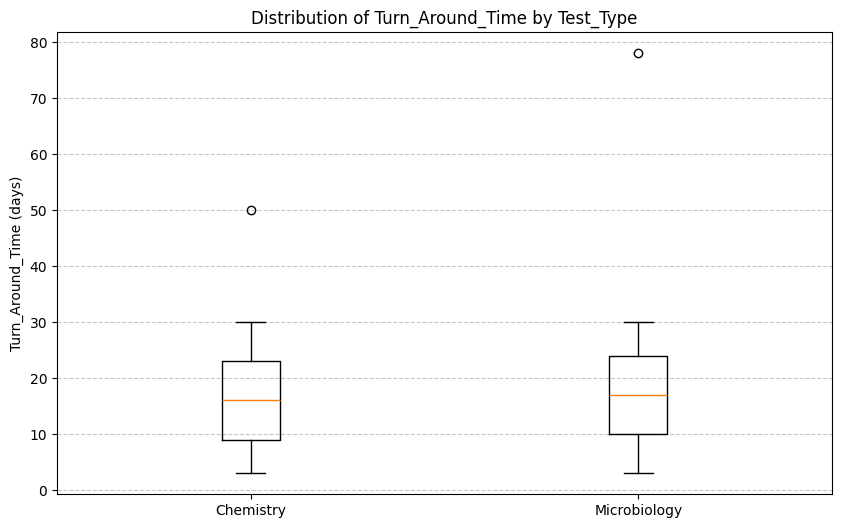

In [41]:
#Box plot 'Turn_Around_Time' to verify distribution and check outliers
# Filter data by Test_Type, excluding NaN in Turn_Around_Time
chemistry_data = df[df['Test_Type'] == 'Chemistry']['Turn_Around_Time'].dropna()
microbiology_data = df[df['Test_Type'] == 'Microbiology']['Turn_Around_Time'].dropna()

# Create boxplots
plt.figure(figsize=(10, 6))
plt.boxplot([chemistry_data, microbiology_data], labels=['Chemistry', 'Microbiology'])
plt.title('Distribution of Turn_Around_Time by Test_Type')
plt.ylabel('Turn_Around_Time (days)')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

In [42]:
# Print basic statistics for reference
print("Statistics for Turn_Around_Time (Chemistry):")
print(chemistry_data.describe())
print("\nStatistics for Turn_Around_Time (Microbiology):")
print(microbiology_data.describe())

Statistics for Turn_Around_Time (Chemistry):
count    470.000000
mean      16.108511
std        8.495511
min        3.000000
25%        9.000000
50%       16.000000
75%       23.000000
max       50.000000
Name: Turn_Around_Time, dtype: float64

Statistics for Turn_Around_Time (Microbiology):
count    476.000000
mean      16.764706
std        8.787509
min        3.000000
25%       10.000000
50%       17.000000
75%       24.000000
max       78.000000
Name: Turn_Around_Time, dtype: float64


*Strategy : There are only 2 outliers (50 days in chemistry and 78 days in Microbiology). However, the impact of these outliers is negligeable on the dataset of 1000 entries. Furthermore, the mean of TAT for chemistry and microbiology is slightly the same (16 days). The missing Final_CofA_Date will be replaced by **'Sample_Received_Date' + ~16 days***

In [43]:
####Replace NaN in Final_CofA_Date by Sample_Received + mean TAT ####
# Calculate the global mean Turn_Around_Time, excluding NaN
mean_turn_around_time = df['Turn_Around_Time'].mean()
print(f"Global mean Turn_Around_Time: {mean_turn_around_time:.2f} days")

# Impute NaN in Final_CofA_Date
# For rows where Final_CofA_Date is NaN and Sample_Received_Date is not NaN
mask = df['Final_CofA_Date_dt'].isna() & df['Sample_Received_Date_dt'].notna()
df.loc[mask, 'Final_CofA_Date_dt'] = df.loc[mask, 'Sample_Received_Date_dt'] + pd.Timedelta(days=mean_turn_around_time)

# Update the original Final_CofA_Date column with formatted dates
df['Final_CofA_Date'] = df['Final_CofA_Date_dt'].dt.strftime('%m/%d/%Y')

# Verify the results
print(f"Number of NaN in Final_CofA_Date after imputation: {df['Final_CofA_Date'].isna().sum()}")
print("\nSample of imputed rows:")
print(df[mask][['Sample_Received_Date', 'Final_CofA_Date', 'Test_Type']])
print("\nStatistics for Turn_Around_Time after imputation:")
df['Turn_Around_Time'] = (df['Final_CofA_Date_dt'] - df['Sample_Received_Date_dt']).dt.days
print(df['Turn_Around_Time'].describe())

Global mean Turn_Around_Time: 16.44 days
Number of NaN in Final_CofA_Date after imputation: 0

Sample of imputed rows:
    Sample_Received_Date Final_CofA_Date     Test_Type
3             02/08/2023      02/24/2023  Microbiology
4             11/10/2023      11/26/2023     Chemistry
35            12/02/2023      12/18/2023  Microbiology
46            01/07/2025      01/23/2025     Chemistry
58            04/09/2023      04/25/2023  Microbiology
61            01/24/2024      02/09/2024     Chemistry
76            08/10/2023      08/26/2023  Microbiology
91            10/17/2023      11/02/2023     Chemistry
103           09/17/2024      10/03/2024     Chemistry
122           12/02/2023      12/18/2023     Chemistry
151           03/09/2024      03/25/2024  Microbiology
156           04/07/2025      04/23/2025     Chemistry
190           12/29/2024      01/14/2025     Chemistry
217           04/19/2025      05/05/2025     Chemistry
245           07/22/2023      08/07/2023  Microbiology
2

Strategy for 'Revenue' : **handle NaN and Outliers at the same time**

check the distribution of Revenue and if there is a difference between Chemistry vs Microbiology. Verify if outliers impact the distribution. Replace NaN in Revenue by either mean or median depending the insights from distribution analysis.

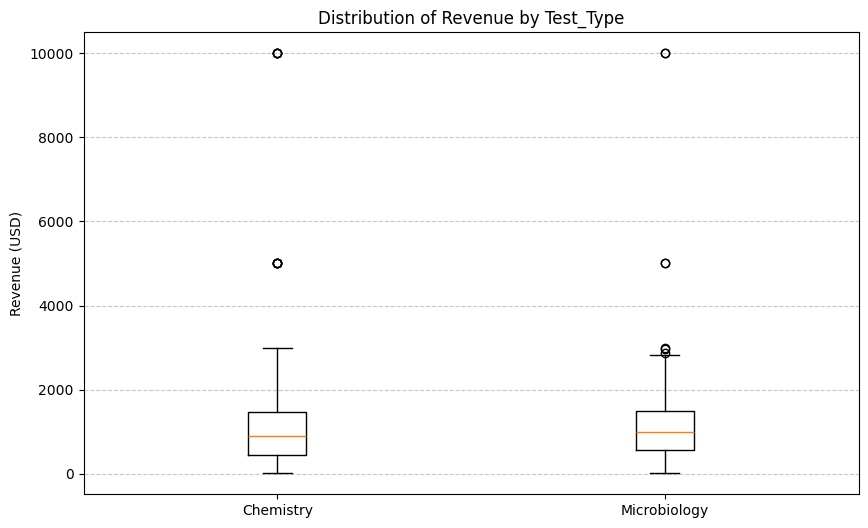

In [44]:
#Box plot 'Revenue' to verify distribution and check outliers
# Filter data by Test_Type, excluding NaN in Revenue
chemistry_revenue = df[df['Test_Type'] == 'Chemistry']['Revenue'].dropna()
microbiology_revenue = df[df['Test_Type'] == 'Microbiology']['Revenue'].dropna()

# Create boxplots
plt.figure(figsize=(10, 6))
plt.boxplot([chemistry_revenue, microbiology_revenue], labels=['Chemistry', 'Microbiology'])
plt.title('Distribution of Revenue by Test_Type')
plt.ylabel('Revenue (USD)')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

In [45]:
# Print basic statistics for reference
print("Statistics for Revenue (Chemistry):")
print(chemistry_revenue.describe())
print("\nStatistics for Revenue (Microbiology):")
print(microbiology_revenue.describe())

Statistics for Revenue (Chemistry):
count      474.000000
mean      1135.464219
std       1134.120283
min         10.000000
25%        455.420000
50%        906.500000
75%       1473.845000
max      10000.000000
Name: Revenue, dtype: float64

Statistics for Revenue (Microbiology):
count      478.000000
mean      1130.178452
std        894.840437
min         10.000000
25%        564.020000
50%       1000.245000
75%       1482.717500
max      10000.000000
Name: Revenue, dtype: float64


Strategy : Both chemistry and microbiolgy have comparable distribution of Revenue with 2 majors higher outliers (~5000 and 10000$), one lower outlier (10).
Check for outliers using IQR of the global distribution of Revenue
Filter for outliers and check statistics for impact on distribution after removal

In [46]:
#Filter higher outlier using IQR 
Q1 = df['Revenue'].quantile(0.25)
Q3 = df['Revenue'].quantile(0.75)
IQR = Q3-Q1
high_outlier = Q3 + 1.5*IQR
low_outlier = Q1 - 1.5*IQR
print('High outlier limit is:',high_outlier)
print('Low outlier limit is:',low_outlier)

High outlier limit is: 2907.75
Low outlier limit is: -892.6700000000001


In [47]:
revenue_filtered = df[df['Revenue']<high_outlier]
revenue_filtered.describe()

,Number_of_Tests,Revenue,Sample_Received_Date_dt,Final_CofA_Date_dt,Turn_Around_Time
count,936.000000,936.000000,936,936,936.000000
mean,5.577991,1041.117981,2024-02-28 03:50:46.153846016,2024-03-15 14:37:00.653764864,16.426282
min,1.000000,10.000000,2023-01-04 00:00:00,2023-01-10 00:00:00,3.000000
25%,3.000000,529.190000,2023-08-17 00:00:00,2023-09-01 00:00:00,10.000000
50%,6.000000,939.430000,2024-03-06 12:00:00,2024-03-21 00:00:00,16.000000
75%,8.000000,1458.145000,2024-09-14 00:00:00,2024-09-30 06:00:00,23.000000
max,10.000000,2877.060000,2025-04-19 00:00:00,2025-05-12 00:00:00,78.000000
std,2.840936,650.592798,NaN,NaN,8.419160


In [48]:
#verify entry with Revenue = 10$
revenue_10 = df[df['Revenue']==10]
print(revenue_10)

                               Request_ID Sample_Received_Date  \
109  eb6d73e6-d426-44b9-b008-ead767f7f2a8           07/29/2023   
310  c2d3f86c-9b8c-4455-80b8-9f17ff8411eb           02/10/2023   
650  ff5cc2e3-7881-4544-aab9-06c56cbecbde           03/12/2025   
738  7633d712-e16c-4a25-be94-04e1a1ae29ac           04/07/2023   
809  1cda4042-5d7c-4a67-bc7e-1aa1b9e1f9f3           12/22/2023   
859  2b24e460-9c3a-4af5-b1ae-7bb76bc70e8b           09/01/2024   

     Number_of_Tests     Test_Type  \
109                6     Chemistry   
310                4     Chemistry   
650                8     Chemistry   
738                5     Chemistry   
809                3     Chemistry   
859                2  Microbiology   

                                            Test_Names Final_CofA_Date  \
109                                                NaN      08/09/2023   
310              Hardness, Nitrate, Sulfate, Phosphate      02/13/2023   
650  Sulfate, Heavy Metals, pH, Chloride, Nitrat

In [49]:
# Filter rows where Revenue > 10 and Revenue < high_outlier
revenue_filtered_final = df[(df['Revenue'] > 10) & (df['Revenue'] < high_outlier)]

# Display results
print(f"Number of rows after filtering: {len(revenue_filtered_final)}")
print("\nSample of filtered data:")
print(revenue_filtered_final[['Request_ID', 'Revenue', 'Test_Type']].head())
print("\nStatistics for filtered Revenue:")
print(revenue_filtered_final['Revenue'].describe())

Number of rows after filtering: 930

Sample of filtered data:
                             Request_ID  Revenue     Test_Type
0  33b1ff8d-a70e-4b58-a8e7-8d27685c32f0   316.97     Chemistry
1  7cffd9e9-9b9f-4d80-aadd-a71eefc8362f   729.00  Microbiology
2  5190c8b5-5365-4358-ba5b-27db933d0db0   789.20     Chemistry
3  452e54a6-6282-4c65-960d-c5e5275a7f6f  1344.81  Microbiology
4  3f168fdb-c0bd-4ee3-979e-7430c5304f40  1323.30     Chemistry

Statistics for filtered Revenue:
count     930.000000
mean     1047.770355
std       647.374421
min        85.900000
25%       532.747500
50%       944.850000
75%      1459.900000
max      2877.060000
Name: Revenue, dtype: float64


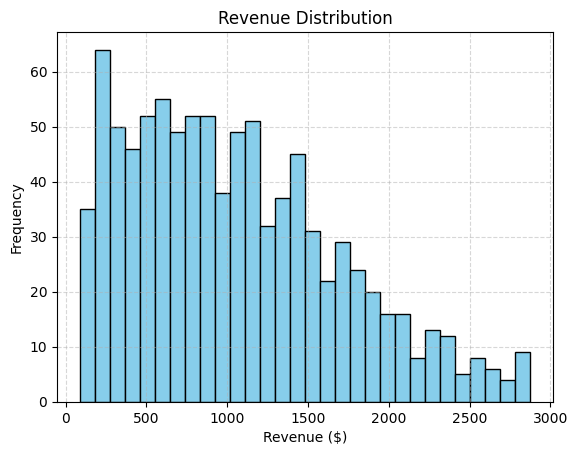

In [50]:
plt.hist(revenue_filtered_final['Revenue'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel("Revenue ($)")
plt.ylabel("Frequency")
plt.title("Revenue Distribution")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

<ipython-input-51-08e036034753>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue_filtered_final['Revenue_log'] = np.log1p(revenue_filtered_final['Revenue'])


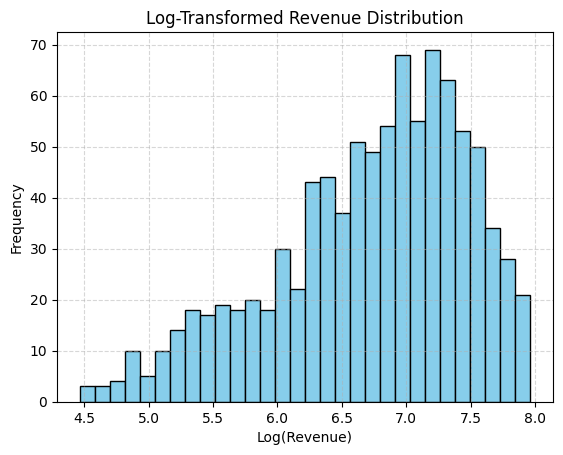

In [51]:
# Log Transformation (add +1 pour éviter log(0))
revenue_filtered_final['Revenue_log'] = np.log1p(revenue_filtered_final['Revenue'])

plt.hist(revenue_filtered_final['Revenue_log'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel("Log(Revenue)")
plt.ylabel("Frequency")
plt.title("Log-Transformed Revenue Distribution")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

In [52]:
####Replace NaN in Revenue by mean ####
# Calculate the mean Revenue, excluding NaN
mean_revenue = revenue_filtered_final['Revenue'].mean()
print(f"Mean Revenue: {mean_revenue:.2f} $")

# Impute NaN in Revenue in original df
df['Revenue'] = df['Revenue'].fillna(mean_revenue)

# Verify the results
print(f"Number of NaN in Revenue after imputation: {df['Revenue'].isna().sum()}")
print("\nSample of imputed rows:")
print("\nStatistics for Revenue after imputation:")
print(df['Revenue'].describe())

Mean Revenue: 1047.77 $
Number of NaN in Revenue after imputation: 0

Sample of imputed rows:

Statistics for Revenue after imputation:
count     1000.000000
mean      1128.728317
std        995.825139
min         10.000000
25%        546.410000
50%       1018.340000
75%       1458.145000
max      10000.000000
Name: Revenue, dtype: float64


In [53]:
df.isnull().sum()

Request_ID                  0
Sample_Received_Date        0
Number_of_Tests             0
Test_Type                   0
Test_Names                 63
Final_CofA_Date             0
Revenue                     0
Sample_Received_Date_dt     0
Final_CofA_Date_dt          0
Turn_Around_Time            0
dtype: int64

In [54]:
df.to_csv('Environmental_cleaned.csv')

✨Data cleaning & wrangling process completed.✨

⚠️For Revenue Analysis and forecasting, df have to be filtered to keep Revenue > 10 and < high_outlier ⚠️

✅**Exploratory Data Analysis → Correlation**

Revenue vs Number_of_Tests

Pearson Correlation Coefficient (r): 0.792
P-value: 2.054e-201

Interpretation:
The correlation is statistically significant (p < 0.05).
Strong positive linear relationship.


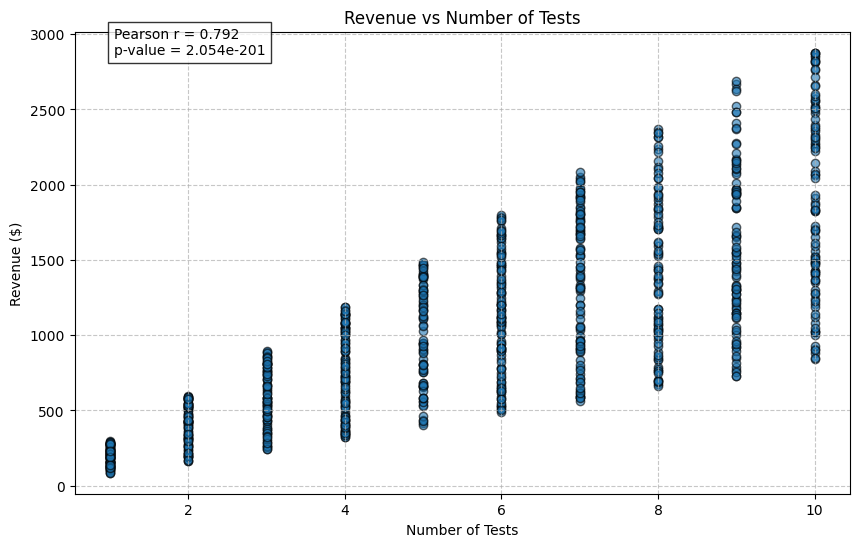

In [55]:
from scipy.stats import pearsonr

# Drop any rows with NaN in Revenue or Number_of_Tests
data = revenue_filtered_final[['Revenue', 'Number_of_Tests']].dropna()

# Calculate Pearson correlation and p-value
correlation, p_value = pearsonr(data['Revenue'], data['Number_of_Tests'])

# Display results
print(f"Pearson Correlation Coefficient (r): {correlation:.3f}")
print(f"P-value: {p_value:.3e}")
print("\nInterpretation:")
if p_value < 0.05:
    print(f"The correlation is statistically significant (p < 0.05).")
    if correlation > 0.7:
        print("Strong positive linear relationship.")
    elif correlation > 0.3:
        print("Moderate positive linear relationship.")
    else:
        print("Weak positive linear relationship.")
else:
    print("The correlation is not statistically significant (p >= 0.05).")

# Create scatter plot with correlation annotation
plt.figure(figsize=(10, 6))
plt.scatter(data['Number_of_Tests'], data['Revenue'], alpha=0.6, edgecolors='k')
plt.title('Revenue vs Number of Tests')
plt.xlabel('Number of Tests')
plt.ylabel('Revenue ($)')
plt.grid(True, linestyle='--', alpha=0.7)

# Add correlation and p-value annotation
plt.text(
    0.05, 0.95, 
    f'Pearson r = {correlation:.3f}\np-value = {p_value:.3e}',
    transform=plt.gca().transAxes, 
    bbox=dict(facecolor='white', alpha=0.8)
)
plt.savefig('Correlation_RevenuevsNumberTests.png', dpi=300)
plt.show()

Strong positive correlation between Number of Tests and Revenue (r=79.2%, p<<0.05)

Pivot Table (Mean Revenue by Test_Type and Number_of_Tests):
Number_of_Tests          1           2           3           4            5   \
Test_Type                                                                      
Chemistry        198.818039  376.414419  596.652340  686.889111   978.098974   
Microbiology     192.714054  424.362143  565.467297  789.258438  1045.354762   

Number_of_Tests           6            7            8            9   \
Test_Type                                                             
Chemistry        1107.171481  1333.474468  1468.292619  1583.243256   
Microbiology     1159.461538  1352.650784  1416.951333  1589.506226   

Number_of_Tests           10  
Test_Type                     
Chemistry        1969.715417  
Microbiology     1805.635833  


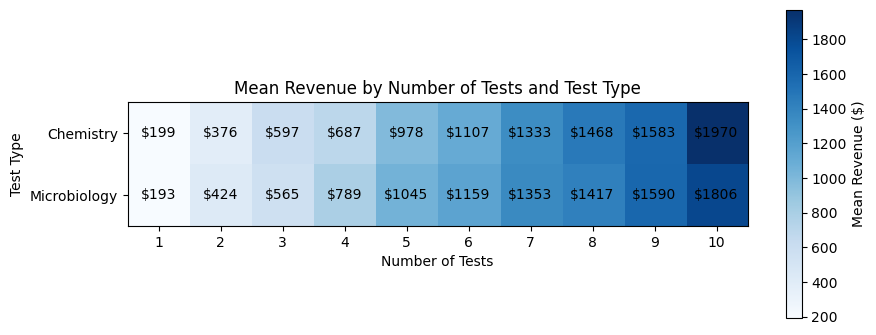

In [56]:
###Heatmap Revenue vs Number_of_Tests vs Test_Type
# Create pivot table with mean Revenue
pivot_table = revenue_filtered_final.pivot_table(
    index='Test_Type',
    columns='Number_of_Tests',
    values='Revenue',
    aggfunc='mean'
)

# Ensure Number_of_Tests is sorted (1, 2, 3, ...)
pivot_table = pivot_table.sort_index(axis=1)

# Display pivot table for verification
print("Pivot Table (Mean Revenue by Test_Type and Number_of_Tests):")
print(pivot_table)

# Create heatmap
fig, ax = plt.subplots(figsize=(10, 4))
cax = ax.imshow(pivot_table, cmap='Blues', interpolation='nearest')

# Add labels
ax.set_xticks(range(len(pivot_table.columns)))
ax.set_xticklabels(pivot_table.columns)
ax.set_yticks(range(len(pivot_table.index)))
ax.set_yticklabels(pivot_table.index)

# Add annotations (mean Revenue values)
for i in range(len(pivot_table.index)):
    for j in range(len(pivot_table.columns)):
        value = pivot_table.iloc[i, j]
        if not pd.isna(value):  # Skip NaN values
            ax.text(j, i, f'${value:.0f}', ha='center', va='center', color='black')

# Add colorbar
cbar = plt.colorbar(cax)
cbar.set_label('Mean Revenue ($)')

# Title and labels
plt.title('Mean Revenue by Number of Tests and Test Type')
plt.xlabel('Number of Tests')
plt.ylabel('Test Type')
plt.savefig('heatmap_MeanRevenuevsNumberTestvsType.png',dpi=300)
plt.show()

Statistics for Revenue by Test_Type:

Chemistry:
count     459.00000
mean     1024.35451
std       667.37119
min        85.90000
25%       459.53000
50%       897.57000
75%      1438.41000
max      2877.06000
Name: Revenue, dtype: float64

Microbiology:
count     471.000000
mean     1070.589618
std       627.143222
min        90.150000
25%       560.535000
50%       993.180000
75%      1472.170000
max      2873.330000
Name: Revenue, dtype: float64

T-test Results:
T-statistic: -1.089
P-value: 2.764e-01

Mann-Whitney U Test Results:
U-statistic: 101884.000
P-value: 1.294e-01

Interpretation:
T-test: No significant difference in mean Revenue between Chemistry and Microbiology (p >= 0.05).
Mann-Whitney U: No significant difference in Revenue distributions between Chemistry and Microbiology (p >= 0.05).


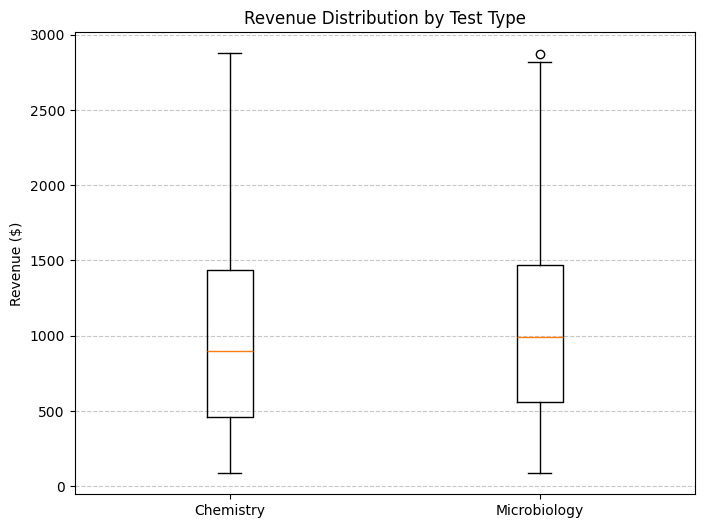

In [57]:
####Test for statistical difference in Revenue Between Test_Types####
from scipy.stats import ttest_ind, mannwhitneyu

# Separate Revenue by Test_Type
chemistry_revenue = revenue_filtered_final[revenue_filtered_final['Test_Type'] == 'Chemistry']['Revenue'].dropna()
microbiology_revenue = revenue_filtered_final[revenue_filtered_final['Test_Type'] == 'Microbiology']['Revenue'].dropna()

# Display basic statistics
print("Statistics for Revenue by Test_Type:")
print("\nChemistry:")
print(chemistry_revenue.describe())
print("\nMicrobiology:")
print(microbiology_revenue.describe())

# Perform t-test
t_stat, p_value_ttest = ttest_ind(chemistry_revenue, microbiology_revenue, equal_var=True)

# Perform Mann-Whitney U test (non-parametric alternative)
u_stat, p_value_mannwhitney = mannwhitneyu(chemistry_revenue, microbiology_revenue, alternative='two-sided')

# Display results
print("\nT-test Results:")
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value_ttest:.3e}")
print("\nMann-Whitney U Test Results:")
print(f"U-statistic: {u_stat:.3f}")
print(f"P-value: {p_value_mannwhitney:.3e}")

# Interpretation
print("\nInterpretation:")
if p_value_ttest < 0.05:
    print("T-test: Significant difference in mean Revenue between Chemistry and Microbiology (p < 0.05).")
else:
    print("T-test: No significant difference in mean Revenue between Chemistry and Microbiology (p >= 0.05).")
if p_value_mannwhitney < 0.05:
    print("Mann-Whitney U: Significant difference in Revenue distributions between Chemistry and Microbiology (p < 0.05).")
else:
    print("Mann-Whitney U: No significant difference in Revenue distributions between Chemistry and Microbiology (p >= 0.05).")

# Create boxplot
plt.figure(figsize=(8, 6))
plt.boxplot([chemistry_revenue, microbiology_revenue], labels=['Chemistry', 'Microbiology'])
plt.title('Revenue Distribution by Test Type')
plt.ylabel('Revenue ($)')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

Number_of_Tests vs Turn_Around_Time

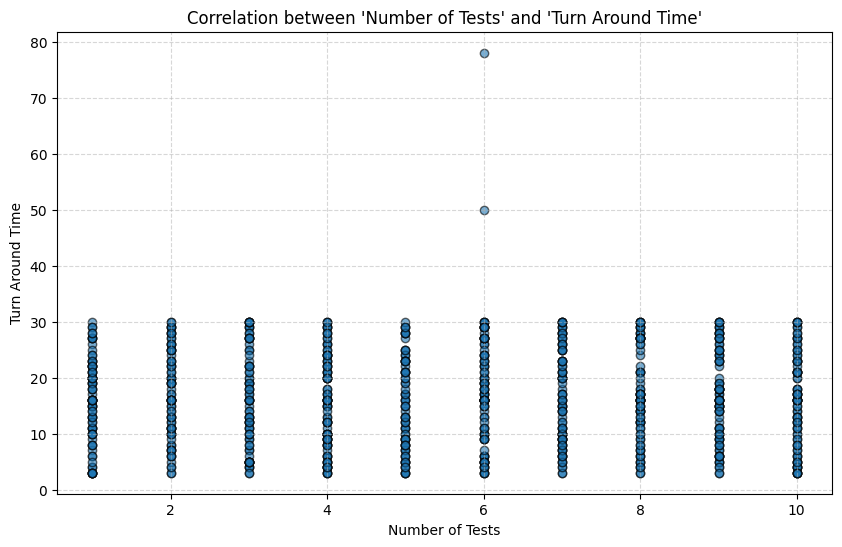

In [58]:
# Scatter plot 'Turn_Around_Time' vs 'Number_of_Test'
y = revenue_filtered_final['Turn_Around_Time']
x = revenue_filtered_final['Number_of_Tests']

plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.6, edgecolors='k')

# Add Title and labels
plt.xlabel('Number of Tests')
plt.ylabel('Turn Around Time')
plt.title("Correlation between 'Number of Tests' and 'Turn Around Time'")

# Add grid
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

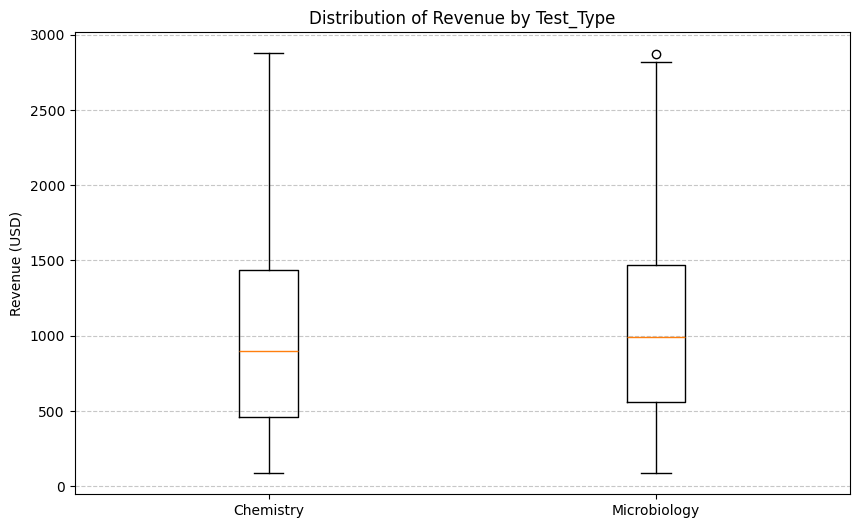

In [59]:
#Box plot 'Revenue' vs Test_Type
# Filter data by Test_Type, excluding NaN in Revenue
chemistry_revenue = revenue_filtered_final[revenue_filtered_final['Test_Type'] == 'Chemistry']['Revenue'].dropna()
microbiology_revenue = revenue_filtered_final[revenue_filtered_final['Test_Type'] == 'Microbiology']['Revenue'].dropna()

# Create boxplots
plt.figure(figsize=(10, 6))
plt.boxplot([chemistry_revenue, microbiology_revenue], labels=['Chemistry', 'Microbiology'])
plt.title('Distribution of Revenue by Test_Type')
plt.ylabel('Revenue (USD)')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

Test Names : contribution of each test in Revenue

Number of NaN in Test_Names: 56
Number of inconsistent rows (Test_Count != Number_of_Tests): 0

Revenue Statistics by Test:
                    Test_Name  Mean_Revenue_per_Test  Test_Count  \
5                 Enterococci             191.186650         249   
11                 Legionella             190.614289         240   
12                    Nitrate             190.325277         265   
8                    Hardness             189.794878         245   
19                         pH             188.684987         247   
14     Pseudomonas aeruginosa             188.331678         249   
16                        TOC             188.058121         225   
0                  Alkalinity             187.248047         238   
3             Cryptosporidium             187.220145         246   
7                     Giardia             187.118028         250   
9                Heavy Metals             186.770604         232   
1                    Chloride             186.618468        

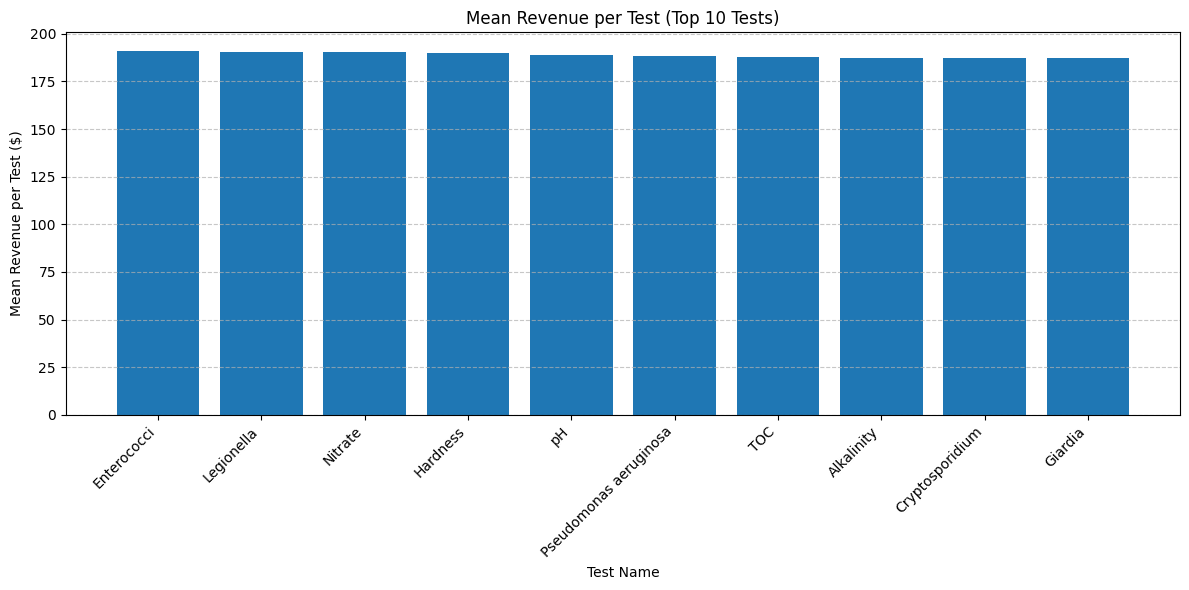

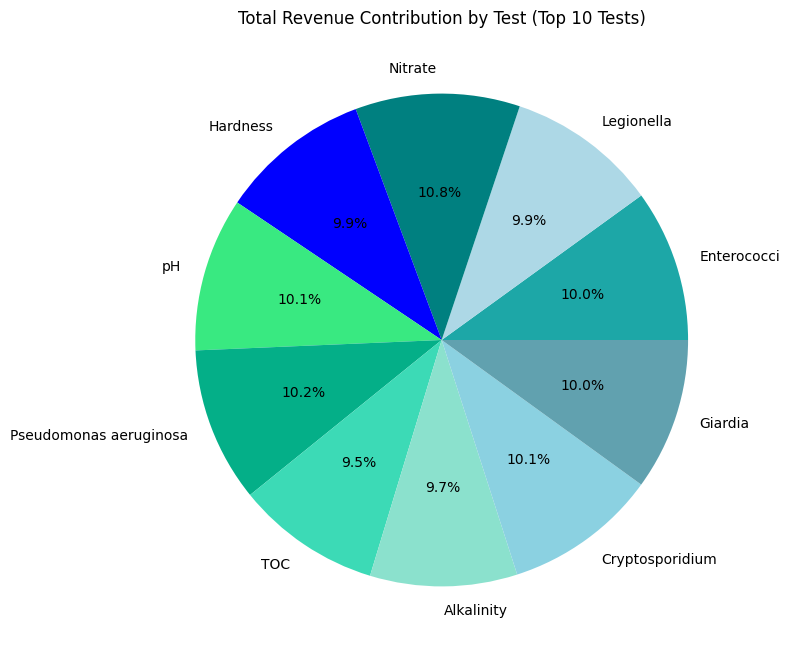

In [76]:
# Check NaN in Test_Names
print(f"Number of NaN in Test_Names: {revenue_filtered_final['Test_Names'].isna().sum()}")

# Exclude rows with NaN in Test_Names
df_tests = revenue_filtered_final.dropna(subset=['Test_Names']).copy()

# Verify consistency between Number_of_Tests and Test_Names
df_tests['Test_Count'] = df_tests['Test_Names'].str.split(',').str.len()
inconsistent = df_tests[df_tests['Test_Count'] != df_tests['Number_of_Tests']]
print(f"Number of inconsistent rows (Test_Count != Number_of_Tests): {len(inconsistent)}")
if len(inconsistent) > 0:
    print("Inconsistent rows:")
    print(inconsistent[['Test_Names', 'Number_of_Tests', 'Test_Count']])

# Calculate Revenue per test
df_tests['Revenue_per_Test'] = df_tests['Revenue'] / df_tests['Number_of_Tests']

# Split and explode Test_Names
df_tests['Test_Names_List'] = df_tests['Test_Names'].str.split(',')
df_exploded = df_tests.explode('Test_Names_List')
df_exploded['Test_Names_List'] = df_exploded['Test_Names_List'].str.strip()

# Calculate mean and total Revenue per test
test_revenue_stats = df_exploded.groupby('Test_Names_List').agg({
    'Revenue_per_Test': ['mean', 'count'],
    'Revenue': 'sum'
}).reset_index()
test_revenue_stats.columns = ['Test_Name', 'Mean_Revenue_per_Test', 'Test_Count', 'Total_Revenue']
test_revenue_stats = test_revenue_stats.sort_values('Mean_Revenue_per_Test', ascending=False)

# Display results
print("\nRevenue Statistics by Test:")
print(test_revenue_stats)

# Plot barplot for mean Revenue per test (top 10 tests)
top_tests = test_revenue_stats.head(10)
plt.figure(figsize=(12, 6))
plt.bar(top_tests['Test_Name'], top_tests['Mean_Revenue_per_Test'])
plt.title('Mean Revenue per Test (Top 10 Tests)')
plt.xlabel('Test Name')
plt.ylabel('Mean Revenue per Test ($)')
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot pie chart for total Revenue contribution (top 10 tests)
plt.figure(figsize=(8, 8))
plt.pie(top_tests['Total_Revenue'], labels=top_tests['Test_Name'], autopct='%1.1f%%',colors=['#1da7a7','lightblue','teal','blue','#39e981',
                                                                                           '#04af88','#3cdab6','#8be1cd','#8bd1e1','#61a1af']
                                                                                           )
plt.title('Total Revenue Contribution by Test (Top 10 Tests)')
plt.savefig('piechart_top10testRevenue.png',dpi=300)
plt.show()

Same contribution to Revenue of Top 10 tests

<div style="background-color:#c7cbe9; padding:10px;border:2px solid black;">
    
<h2>🎨Visualization</h2>   
</div>

In [61]:
#check Monthly Revenue
from IPython.display import display

df = revenue_filtered_final.copy()
# Extract year-month from Final_CofA_Date_dt
df['Year_Month'] = df['Final_CofA_Date_dt'].dt.to_period('M')

# Exclude rows with NaN in Year_Month
df = df.dropna(subset=['Year_Month'])

# Aggregate data by month
monthly_data = df.groupby('Year_Month').agg({
    'Revenue': 'sum',
    'Number_of_Tests': 'sum',
    'Final_CofA_Date_dt': 'count'
}).reset_index()

# Rename columns
monthly_data.columns = ['Year_Month', 'Revenue', 'Number_of_Tests', 'CofA_Count']
monthly_data['Year_Month'] = monthly_data['Year_Month'].astype(str)

# Sort by Year_Month
monthly_data = monthly_data.sort_values('Year_Month')

# Calculate thresholds for completeness
avg_cofa = monthly_data['CofA_Count'].mean()
median_revenue = monthly_data['Revenue'].median()
avg_tests = monthly_data['Number_of_Tests'].mean()

print("\nThresholds for Completeness (Reference):")
print(f"Average CofA_Count: {avg_cofa:.1f} lines")
print(f"Median Revenue: {median_revenue:.2f} $")
print(f"Average Number_of_Tests: {avg_tests:.1f} tests")

# Format table for display
monthly_data_display = monthly_data.copy()
monthly_data_display['Revenue'] = monthly_data_display['Revenue'].round(2)
monthly_data_display['Year_Month'] = monthly_data_display['Year_Month'].astype(str)

# Display the table
print("\nMonthly Data Table (Year_Month, Revenue, Number_of_Tests, CofA_Count):")
display(monthly_data_display)

# Highlight May 2025 for manual inspection
print("\nFocus on May 2025:")
may_2025 = monthly_data_display[monthly_data_display['Year_Month'] == '2025-05']
if not may_2025.empty:
    display(may_2025)
    if (may_2025['CofA_Count'].iloc[0] < 0.5 * avg_cofa) or \
       (may_2025['Revenue'].iloc[0] < 0.5 * median_revenue) or \
       (may_2025['Number_of_Tests'].iloc[0] < 0.5 * avg_tests):
        print("Conclusion: May 2025 is likely incomplete (low CofA_Count, Revenue, or Number_of_Tests).")
else:
    print("May 2025 not found in data.")


Thresholds for Completeness (Reference):
Average CofA_Count: 32.1 lines
Median Revenue: 33131.00 $
Average Number_of_Tests: 179.1 tests

Monthly Data Table (Year_Month, Revenue, Number_of_Tests, CofA_Count):


,Year_Month,Revenue,Number_of_Tests,CofA_Count
0,2023-01,19103.24,104,20
1,2023-02,33131.00,186,30
2,2023-03,26573.32,144,26
3,2023-04,38798.73,206,34
4,2023-05,25666.47,135,26
5,2023-06,28928.46,143,26
6,2023-07,28027.64,151,31
7,2023-08,39958.73,205,37
8,2023-09,33936.90,181,38
9,2023-10,20705.51,129,23



Focus on May 2025:


,Year_Month,Revenue,Number_of_Tests,CofA_Count
28,2025-05,9630.94,43,9


Conclusion: May 2025 is likely incomplete (low CofA_Count, Revenue, or Number_of_Tests).


In [62]:
###Create csv to explain why May 2025 was removed
monthly_data_display.to_csv('monthly_data_table.csv')

In [63]:
####Create a new df filtered without May 2025

df = revenue_filtered_final.copy()
# Extract year-month from Final_CofA_Date_dt
df['Year_Month'] = df['Final_CofA_Date_dt'].dt.to_period('M')

# Exclude rows with NaN in Year_Month
df = df.dropna(subset=['Year_Month'])

# Aggregate data by month
monthly_data = df.groupby('Year_Month').agg({
    'Revenue': 'sum',
    'Number_of_Tests': 'sum',
    'Final_CofA_Date_dt': ['count', 'min', 'max']
}).reset_index()

# Flatten MultiIndex columns
monthly_data.columns = ['Year_Month', 'Revenue', 'Number_of_Tests', 'CofA_Count', 'Date_Min', 'Date_Max']
monthly_data['Year_Month'] = monthly_data['Year_Month'].astype(str)

# Calculate thresholds for completeness
avg_cofa = monthly_data['CofA_Count'].mean()
median_revenue = monthly_data['Revenue'].median()
avg_tests = monthly_data['Number_of_Tests'].mean()

print("\nThresholds for Completeness:")
print(f"Average CofA_Count: {avg_cofa:.1f}")
print(f"Median Revenue: {median_revenue:.2f} $")
print(f"Average Number_of_Tests: {avg_tests:.1f}")

# Identify incomplete months
monthly_data['Is_Incomplete'] = (monthly_data['CofA_Count'] < 0.5 * avg_cofa) | \
                               (monthly_data['Revenue'] < 0.5 * median_revenue) | \
                               (monthly_data['Number_of_Tests'] < 0.5 * avg_tests)

# Report incomplete months
print("\nIncomplete Months:")
incomplete_months = monthly_data[monthly_data['Is_Incomplete']]
print(incomplete_months[['Year_Month', 'Revenue', 'Number_of_Tests', 'CofA_Count', 'Date_Min', 'Date_Max']])

# Filter out incomplete months
complete_months = monthly_data[~monthly_data['Is_Incomplete']]['Year_Month']
revenue_filtered_complete = df[df['Year_Month'].astype(str).isin(complete_months)]

# Verify filtered data
print(f"\nFiltered DataFrame Size: {revenue_filtered_complete.shape}")
print(f"Last Month in Filtered Data: {revenue_filtered_complete['Year_Month'].max()}")

# Save filtered DataFrame for use in visualizations
# revenue_filtered_complete is ready for plots and forecast


Thresholds for Completeness:
Average CofA_Count: 32.1
Median Revenue: 33131.00 $
Average Number_of_Tests: 179.1

Incomplete Months:
   Year_Month  Revenue  Number_of_Tests  CofA_Count   Date_Min   Date_Max
28    2025-05  9630.94               43           9 2025-05-01 2025-05-12

Filtered DataFrame Size: (921, 12)
Last Month in Filtered Data: 2025-04


In [64]:
revenue_filtered_complete.to_csv('revenue_filtered_complete.csv')

<ipython-input-65-8ab0492905f4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue_filtered_complete['Year_Month'] = revenue_filtered_complete['Final_CofA_Date_dt'].dt.to_period('M')


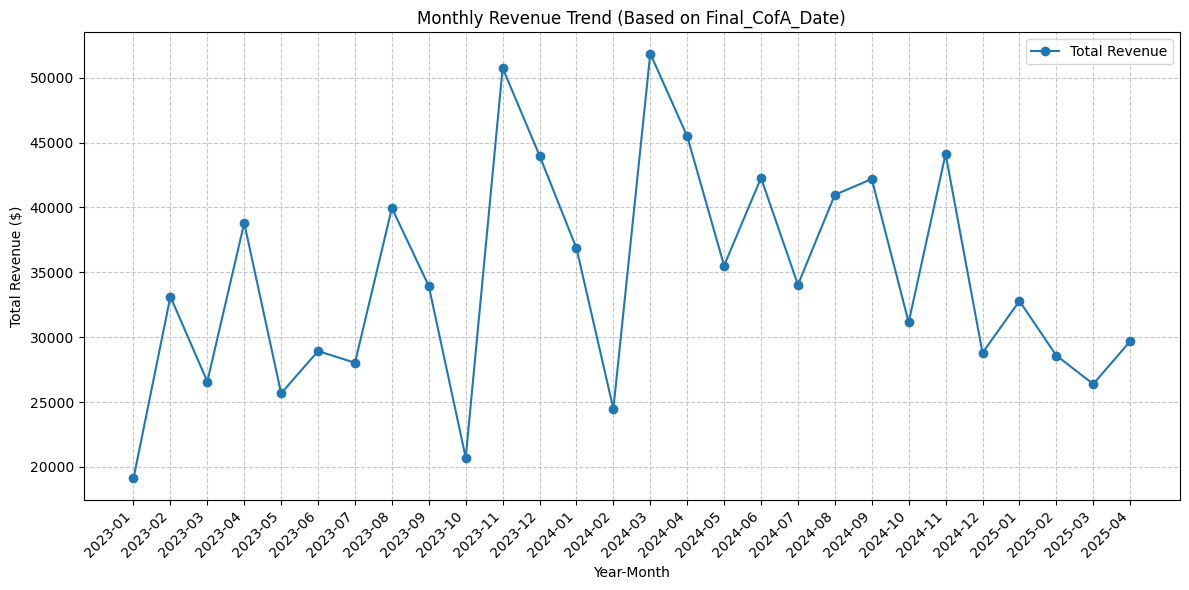

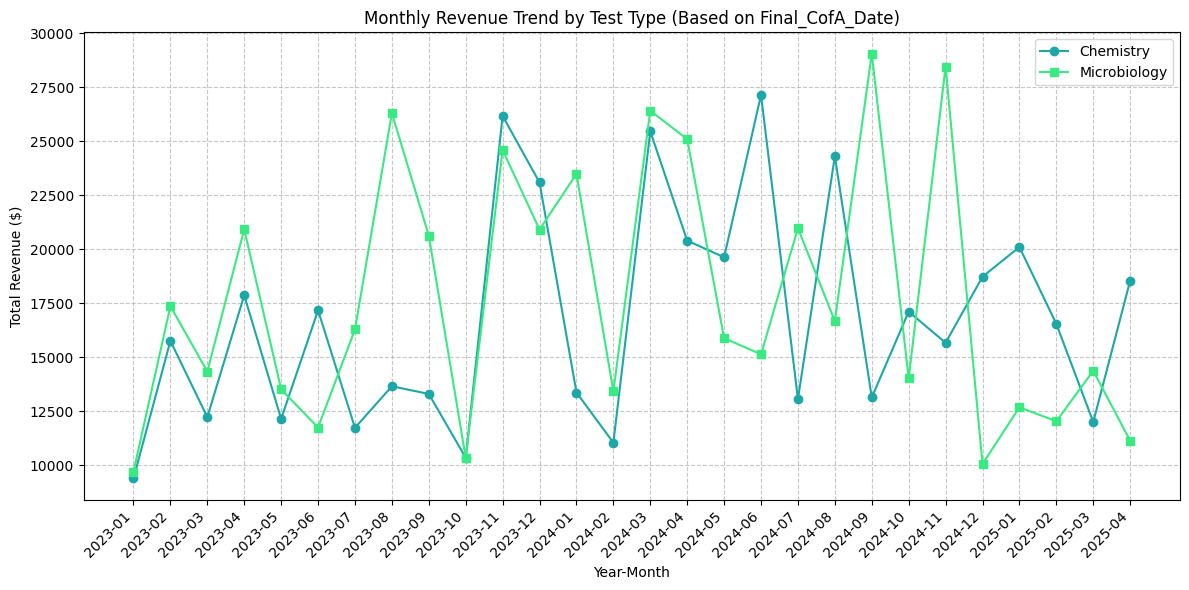

In [65]:
# 1. Monthly Revenue Trends (based on Final_CofA_Date)
# Extract year-month from Final_CofA_Date
revenue_filtered_complete['Year_Month'] = revenue_filtered_complete['Final_CofA_Date_dt'].dt.to_period('M')

# Exclude rows with NaN in Year_Month (if any)
df_revenue = revenue_filtered_complete.dropna(subset=['Year_Month'])

# Aggregate Revenue by month
monthly_revenue = df_revenue.groupby('Year_Month')['Revenue'].sum().reset_index()
monthly_revenue['Year_Month'] = monthly_revenue['Year_Month'].astype(str)  # For plotting

# Aggregate Revenue by month and Test_Type
monthly_revenue_by_type = df_revenue.groupby(['Year_Month', 'Test_Type'])['Revenue'].sum().unstack().fillna(0)
monthly_revenue_by_type = monthly_revenue_by_type.reset_index()
monthly_revenue_by_type['Year_Month'] = monthly_revenue_by_type['Year_Month'].astype(str)

# Plot total Revenue
plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue['Year_Month'], monthly_revenue['Revenue'], marker='o', label='Total Revenue')
plt.title('Monthly Revenue Trend (Based on Final_CofA_Date)')
plt.xlabel('Year-Month')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.savefig('LinePlotMonthlyRevenue.png')
plt.show()


# Plot Revenue by Test_Type
plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue_by_type['Year_Month'], monthly_revenue_by_type['Chemistry'], marker='o', label='Chemistry', color='#1da7a7')
plt.plot(monthly_revenue_by_type['Year_Month'], monthly_revenue_by_type['Microbiology'], marker='s', label='Microbiology',color='#39e981')
plt.title('Monthly Revenue Trend by Test Type (Based on Final_CofA_Date)')
plt.xlabel('Year-Month')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.savefig('LinePlotRevenuebyTestType.png',dpi=300)
plt.show()

In [78]:
print(monthly_revenue)

   Year_Month   Revenue
0     2023-01  19103.24
1     2023-02  33131.00
2     2023-03  26573.32
3     2023-04  38798.73
4     2023-05  25666.47
5     2023-06  28928.46
6     2023-07  28027.64
7     2023-08  39958.73
8     2023-09  33936.90
9     2023-10  20705.51
10    2023-11  50759.17
11    2023-12  43998.96
12    2024-01  36858.37
13    2024-02  24473.35
14    2024-03  51867.72
15    2024-04  45492.33
16    2024-05  35515.83
17    2024-06  42282.11
18    2024-07  34042.61
19    2024-08  40977.33
20    2024-09  42194.91
21    2024-10  31140.68
22    2024-11  44125.50
23    2024-12  28792.62
24    2025-01  32788.49
25    2025-02  28584.89
26    2025-03  26386.13
27    2025-04  29684.49


In [79]:
monthly_revenue.describe()

,Revenue
count,28.000000
mean,34456.981786
std,8609.077871
min,19103.240000
25%,28445.577500
50%,33533.950000
75%,41281.725000
max,51867.720000



Top 10 Most Frequent Tests in Chemistry:
   Test_Type Test_Names_List  Count
4  Chemistry         Nitrate    264
9  Chemistry              pH    246
2  Chemistry        Hardness    245
0  Chemistry      Alkalinity    238
1  Chemistry        Chloride    237
3  Chemistry    Heavy Metals    231
5  Chemistry       Phosphate    230
8  Chemistry       Turbidity    230
7  Chemistry             TOC    225
6  Chemistry         Sulfate    222

Top 10 Most Frequent Tests in Microbiology:
       Test_Type            Test_Names_List  Count
19  Microbiology            Total Coliforms    257
12  Microbiology                    E. coli    256
10  Microbiology    Clostridium perfringens    254
14  Microbiology         Fecal Streptococci    251
15  Microbiology                    Giardia    246
18  Microbiology     Pseudomonas aeruginosa    245
13  Microbiology                Enterococci    244
11  Microbiology            Cryptosporidium    240
16  Microbiology  Heterotrophic Plate Count    239
17  Mic

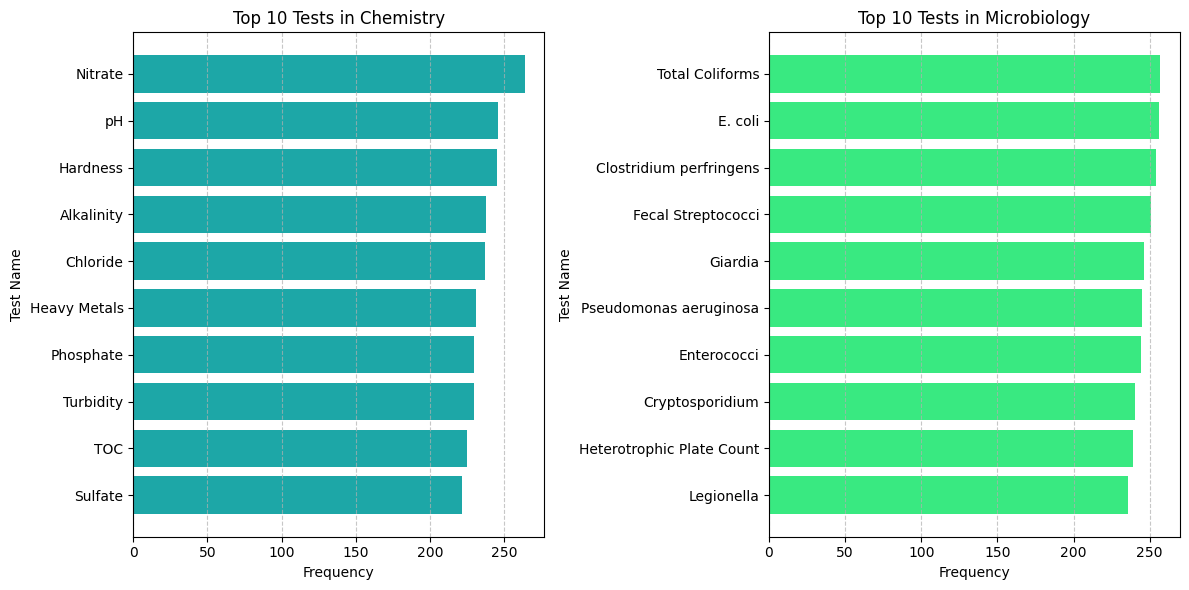

In [66]:
####Bar plot top 10 Tests chemistry vs microbiology by occurency
# Exclude NaN in Test_Names
df_tests = revenue_filtered_complete.dropna(subset=['Test_Names']).copy()

# Split and explode Test_Names
df_tests['Test_Names_List'] = df_tests['Test_Names'].str.split(',')
df_exploded = df_tests.explode('Test_Names_List')
df_exploded['Test_Names_List'] = df_exploded['Test_Names_List'].str.strip()

# Count frequency by Test_Type and Test_Name
test_frequency = df_exploded.groupby(['Test_Type', 'Test_Names_List']).size().reset_index(name='Count')
test_frequency = test_frequency.sort_values(['Test_Type', 'Count'], ascending=[True, False])

# Get top 10 for Chemistry and Microbiology
top_chemistry = test_frequency[test_frequency['Test_Type'] == 'Chemistry'].head(10)
top_microbiology = test_frequency[test_frequency['Test_Type'] == 'Microbiology'].head(10)

# Display results
print("\nTop 10 Most Frequent Tests in Chemistry:")
print(top_chemistry)
print("\nTop 10 Most Frequent Tests in Microbiology:")
print(top_microbiology)

# Plot top 10 tests as horizontal bar charts
plt.figure(figsize=(12, 6))

# Chemistry
plt.subplot(1, 2, 1)
plt.barh(top_chemistry['Test_Names_List'].iloc[::-1], top_chemistry['Count'].iloc[::-1], color='#1da7a7')
plt.title('Top 10 Tests in Chemistry')
plt.xlabel('Frequency')
plt.ylabel('Test Name')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# Microbiology
plt.subplot(1, 2, 2)
plt.barh(top_microbiology['Test_Names_List'].iloc[::-1], top_microbiology['Count'].iloc[::-1], color='#39e981')
plt.title('Top 10 Tests in Microbiology')
plt.xlabel('Frequency')
plt.ylabel('Test Name')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('Top10_Tests.png',dpi=300)
plt.show()


Monthly Turn_Around_Time Statistics:
       Turn_Around_Time
count         28.000000
mean          16.377449
std            1.722272
min           12.111111
25%           15.326029
50%           16.634713
75%           17.505383
max           19.000000

Proposed KPI: Median Turn_Around_Time = 16.0 days


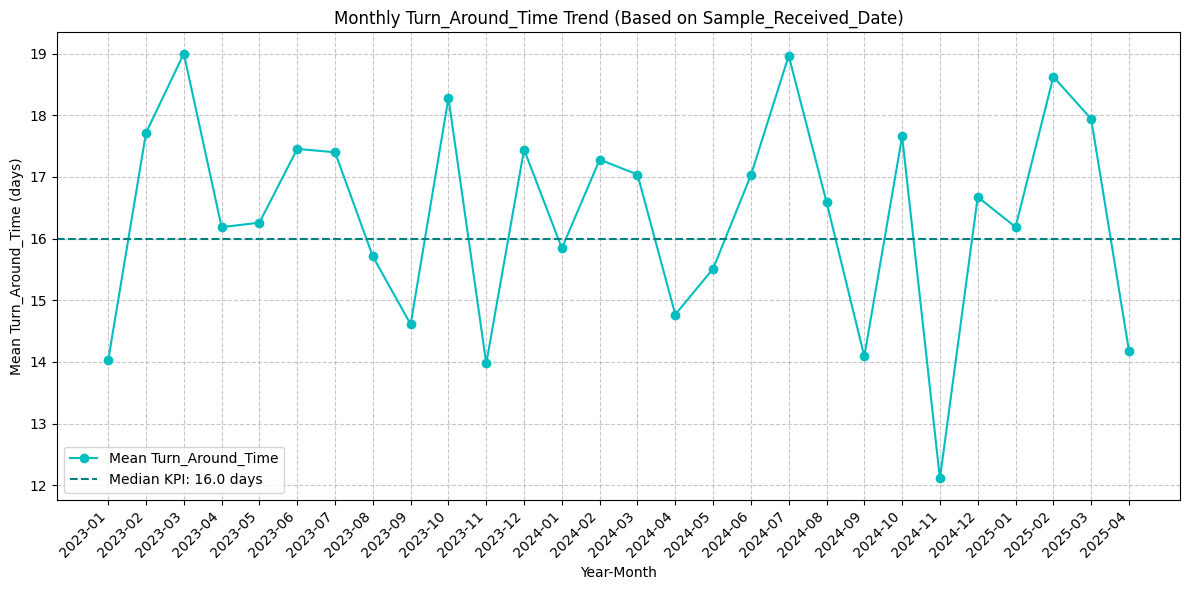

In [67]:
# 3. Monthly Turn_Around_Time Trend (based on Sample_Received_Date)
# Extract year-month from Sample_Received_Date
df = revenue_filtered_complete.copy()
df['Year_Month_TAT'] = df['Sample_Received_Date_dt'].dt.to_period('M')

# Exclude rows with NaN in Year_Month_TAT or Turn_Around_Time
df_tat = df.dropna(subset=['Year_Month_TAT', 'Turn_Around_Time'])

# Aggregate Turn_Around_Time by month
monthly_tat = df_tat.groupby('Year_Month_TAT')['Turn_Around_Time'].mean().reset_index()
monthly_tat['Year_Month_TAT'] = monthly_tat['Year_Month_TAT'].astype(str)

# Display statistics
print("\nMonthly Turn_Around_Time Statistics:")
print(monthly_tat.describe())

# Propose KPI
tat_median = df_tat['Turn_Around_Time'].median()
print(f"\nProposed KPI: Median Turn_Around_Time = {tat_median:.1f} days")

# Plot Turn_Around_Time
plt.figure(figsize=(12, 6))
plt.plot(monthly_tat['Year_Month_TAT'], monthly_tat['Turn_Around_Time'], marker='o', label='Mean Turn_Around_Time', color='#03bebe')
plt.axhline(tat_median, color='teal', linestyle='--', label=f'Median KPI: {tat_median:.1f} days')
plt.title('Monthly Turn_Around_Time Trend (Based on Sample_Received_Date)')
plt.xlabel('Year-Month')
plt.ylabel('Mean Turn_Around_Time (days)')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()

plt.savefig('MonthlyTAT.png')
plt.show()

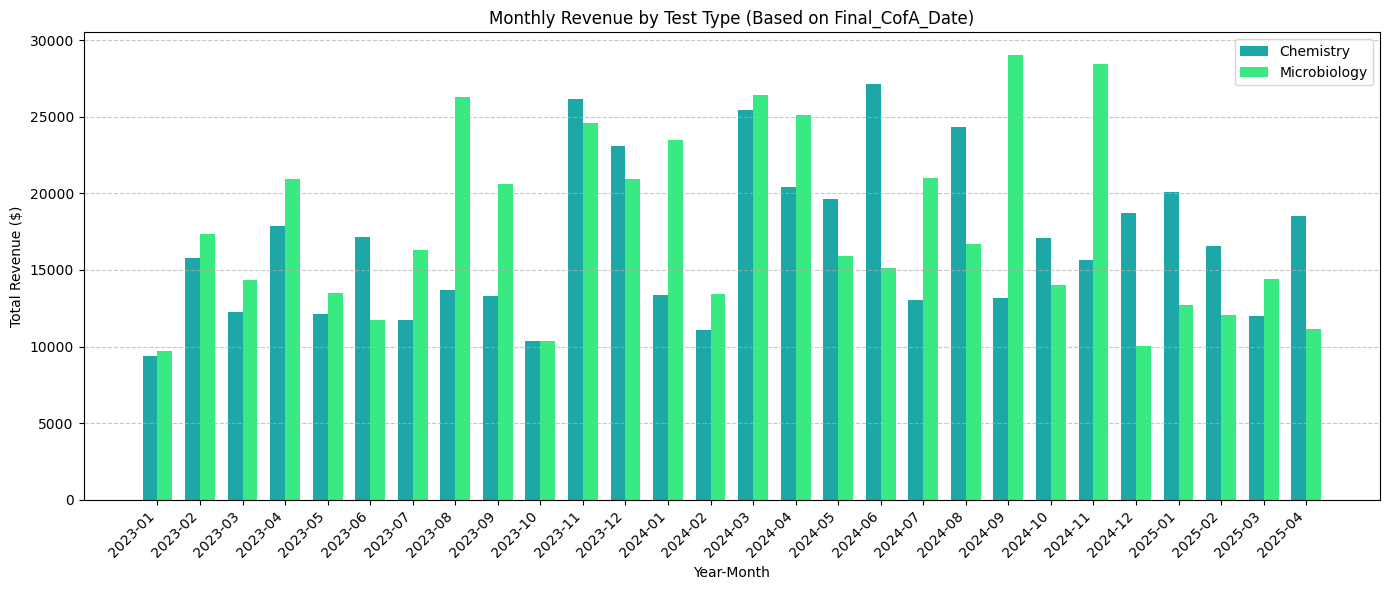


Monthly Revenue by Test_Type:
Test_Type Year_Month  Chemistry  Microbiology
0            2023-01    9393.87       9709.37
1            2023-02   15762.25      17368.75
2            2023-03   12230.54      14342.78
3            2023-04   17873.29      20925.44
4            2023-05   12148.12      13518.35
5            2023-06   17177.87      11750.59
6            2023-07   11737.32      16290.32
7            2023-08   13660.17      26298.56
8            2023-09   13305.50      20631.40
9            2023-10   10354.08      10351.43
10           2023-11   26167.72      24591.45
11           2023-12   23089.07      20909.89
12           2024-01   13371.73      23486.64
13           2024-02   11051.73      13421.62
14           2024-03   25457.17      26410.55
15           2024-04   20398.57      25093.76
16           2024-05   19630.81      15885.02
17           2024-06   27141.98      15140.13
18           2024-07   13067.94      20974.67
19           2024-08   24302.57      16674.76
20 

In [68]:
# Extract year-month from Final_CofA_Date
df = revenue_filtered_complete.copy()
df['Year_Month'] = df['Final_CofA_Date_dt'].dt.to_period('M')

# Exclude rows with NaN in Year_Month
df_revenue = df.dropna(subset=['Year_Month'])

# Aggregate Revenue by month and Test_Type
monthly_revenue_by_type = df_revenue.groupby(['Year_Month', 'Test_Type'])['Revenue'].sum().unstack().fillna(0)
monthly_revenue_by_type = monthly_revenue_by_type.reset_index()
monthly_revenue_by_type['Year_Month'] = monthly_revenue_by_type['Year_Month'].astype(str)

# Prepare data for barplot
months = monthly_revenue_by_type['Year_Month']
chemistry_revenue = monthly_revenue_by_type['Chemistry']
microbiology_revenue = monthly_revenue_by_type['Microbiology']

# Create grouped barplot
plt.figure(figsize=(14, 6))
bar_width = 0.35
x = np.arange(len(months))

plt.bar(x - bar_width/2, chemistry_revenue, bar_width, label='Chemistry', color='#1da7a7')
plt.bar(x + bar_width/2, microbiology_revenue, bar_width, label='Microbiology', color='#39e981')

plt.title('Monthly Revenue by Test Type (Based on Final_CofA_Date)')
plt.xlabel('Year-Month')
plt.ylabel('Total Revenue ($)')
plt.xticks(x, months, rotation=45, ha='right')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.savefig('BargroupedRevenuebyTestType.png',dpi=300)
plt.show()
# Display aggregated data
print("\nMonthly Revenue by Test_Type:")
print(monthly_revenue_by_type[['Year_Month', 'Chemistry', 'Microbiology']])

In [81]:
# Creating the dataset
data = {
    "Year_Month": [
        "2023-01", "2023-02", "2023-03", "2023-04", "2023-05", "2023-06",
        "2023-07", "2023-08", "2023-09", "2023-10", "2023-11", "2023-12",
        "2024-01", "2024-02", "2024-03", "2024-04", "2024-05", "2024-06",
        "2024-07", "2024-08", "2024-09", "2024-10", "2024-11", "2024-12",
        "2025-01", "2025-02", "2025-03", "2025-04"
    ],
    "Chemistry": [
        9393.87, 15762.25, 12230.54, 17873.29, 12148.12, 17177.87, 11737.32, 13660.17, 13305.50,
        10354.08, 26167.72, 23089.07, 13371.73, 11051.73, 25457.17, 20398.57, 19630.81, 27141.98,
        13067.94, 24302.57, 13140.99, 17113.66, 15671.83, 18727.20, 20103.06, 16543.77, 12007.01, 18544.50
    ],
    "Microbiology": [
        9709.37, 17368.75, 14342.78, 20925.44, 13518.35, 11750.59, 16290.32, 26298.56, 20631.40,
        10351.43, 24591.45, 20909.89, 23486.64, 13421.62, 26410.55, 25093.76, 15885.02, 15140.13,
        20974.67, 16674.76, 29053.92, 14027.02, 28453.67, 10065.42, 12685.43, 12041.12, 14379.12, 11139.99
    ]
}

# Creating the DataFrame
df_difference = pd.DataFrame(data)

# Calculating percentage difference
df_difference["Percentage Difference"] = ((df_difference["Microbiology"] - df_difference["Chemistry"]) / df_difference["Chemistry"]) * 100

# Display the results
print(df_difference)

   Year_Month  Chemistry  Microbiology  Percentage Difference
0     2023-01    9393.87       9709.37               3.358573
1     2023-02   15762.25      17368.75              10.192073
2     2023-03   12230.54      14342.78              17.270210
3     2023-04   17873.29      20925.44              17.076599
4     2023-05   12148.12      13518.35              11.279358
5     2023-06   17177.87      11750.59             -31.594604
6     2023-07   11737.32      16290.32              38.790797
7     2023-08   13660.17      26298.56              92.520005
8     2023-09   13305.50      20631.40              55.059186
9     2023-10   10354.08      10351.43              -0.025594
10    2023-11   26167.72      24591.45              -6.023719
11    2023-12   23089.07      20909.89              -9.438145
12    2024-01   13371.73      23486.64              75.643989
13    2024-02   11051.73      13421.62              21.443611
14    2024-03   25457.17      26410.55               3.745035
15    20

In [84]:
print(df_difference.head())

  Year_Month  Chemistry  Microbiology  Percentage Difference
0    2023-01    9393.87       9709.37               3.358573
1    2023-02   15762.25      17368.75              10.192073
2    2023-03   12230.54      14342.78              17.270210
3    2023-04   17873.29      20925.44              17.076599
4    2023-05   12148.12      13518.35              11.279358


In [87]:
print(df_difference.columns)

Index(['Year_Month', 'Chemistry', 'Microbiology', 'Percentage Difference'], dtype='object')


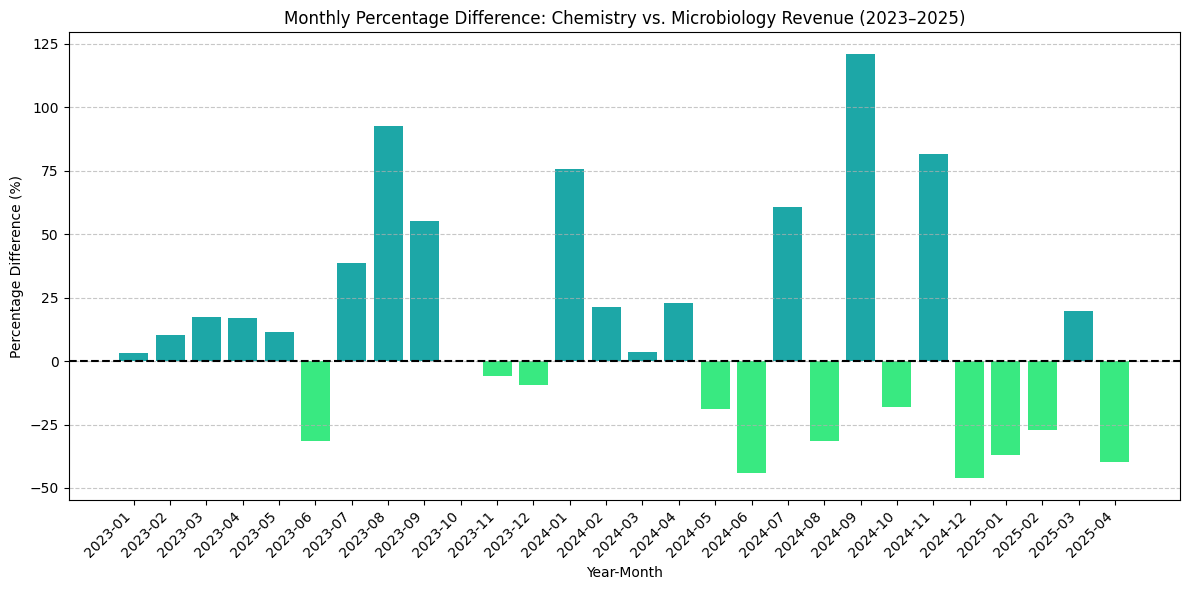

In [91]:
plt.figure(figsize=(12, 6))
plt.bar(df_difference['Year_Month'], df_difference['Percentage Difference'], color=["#1da7a7" if x >= 0 else "#39e981" for x in df_difference['Percentage Difference']])
plt.axhline(0, color="black", linestyle="--")  # Reference line at 0%
plt.title("Monthly Percentage Difference: Chemistry vs. Microbiology Revenue (2023–2025)")
plt.xlabel("Year-Month")
plt.ylabel("Percentage Difference (%)")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig('MonthlyPercentageDifference.png',dpi=300)
plt.show()

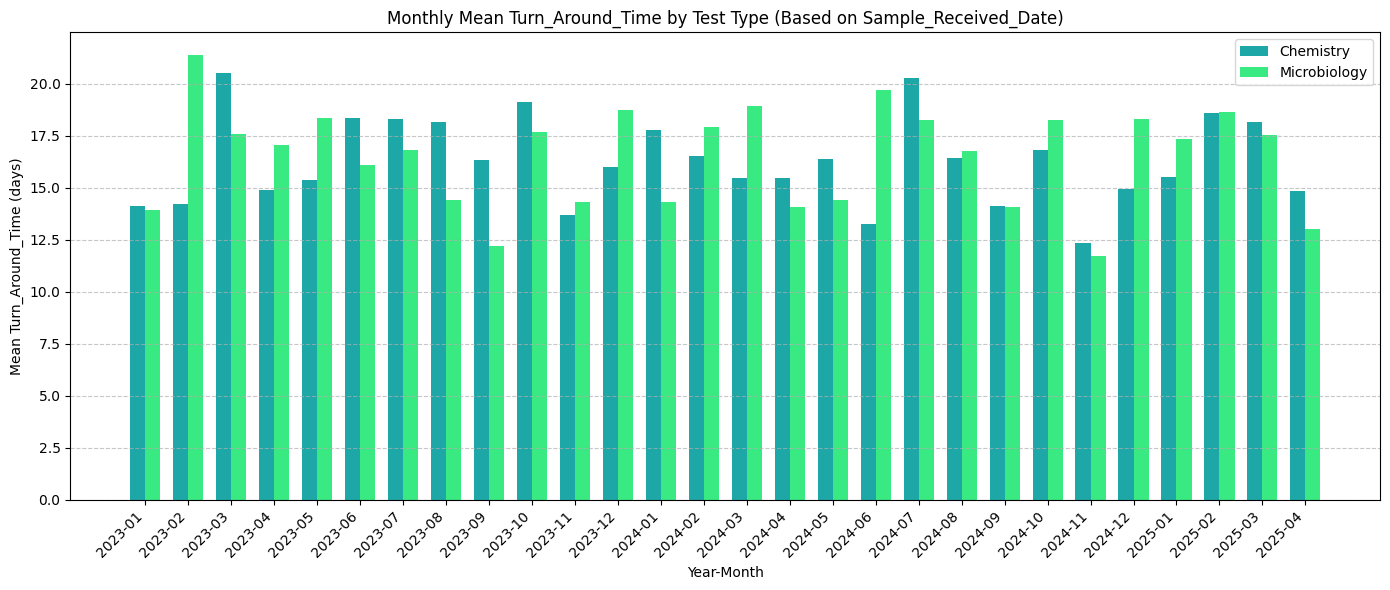


Monthly Mean Turn_Around_Time by Test_Type:
Test_Type Year_Month  Chemistry  Microbiology
0            2023-01  14.133333     13.950000
1            2023-02  14.222222     21.411765
2            2023-03  20.538462     17.571429
3            2023-04  14.909091     17.062500
4            2023-05  15.368421     18.375000
5            2023-06  18.350000     16.076923
6            2023-07  18.300000     16.800000
7            2023-08  18.153846     14.440000
8            2023-09  16.333333     12.200000
9            2023-10  19.153846     17.684211
10           2023-11  13.695652     14.315789
11           2023-12  16.000000     18.736842
12           2024-01  17.785714     14.333333
13           2024-02  16.533333     17.941176
14           2024-03  15.464286     18.956522
15           2024-04  15.461538     14.076923
16           2024-05  16.375000     14.421053
17           2024-06  13.266667     19.714286
18           2024-07  20.300000     18.263158
19           2024-08  16.444444    

In [69]:
# Extract year-month from Sample_Received_Date
df['Year_Month'] = df['Sample_Received_Date_dt'].dt.to_period('M')

# Exclude rows with NaN in Year_Month or Turn_Around_Time
df_tat = df.dropna(subset=['Year_Month', 'Turn_Around_Time'])

# Aggregate Turn_Around_Time by month and Test_Type (mean)
monthly_tat_by_type = df_tat.groupby(['Year_Month', 'Test_Type'])['Turn_Around_Time'].mean().unstack().fillna(0)
monthly_tat_by_type = monthly_tat_by_type.reset_index()
monthly_tat_by_type['Year_Month'] = monthly_tat_by_type['Year_Month'].astype(str)

# Optional: Aggregate Turn_Around_Time by month and Test_Type (median)
monthly_tat_median = df_tat.groupby(['Year_Month', 'Test_Type'])['Turn_Around_Time'].median().unstack().fillna(0)
monthly_tat_median = monthly_tat_median.reset_index()
monthly_tat_median['Year_Month'] = monthly_tat_median['Year_Month'].astype(str)

# Prepare data for barplot (mean)
months = monthly_tat_by_type['Year_Month']
chemistry_tat = monthly_tat_by_type['Chemistry']
microbiology_tat = monthly_tat_by_type['Microbiology']

# Create grouped barplot
plt.figure(figsize=(14, 6))
bar_width = 0.35
x = np.arange(len(months))

plt.bar(x - bar_width/2, chemistry_tat, bar_width, label='Chemistry', color='#1da7a7')
plt.bar(x + bar_width/2, microbiology_tat, bar_width, label='Microbiology', color='#39e981')

plt.title('Monthly Mean Turn_Around_Time by Test Type (Based on Sample_Received_Date)')
plt.xlabel('Year-Month')
plt.ylabel('Mean Turn_Around_Time (days)')
plt.xticks(x, months, rotation=45, ha='right')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

# Display aggregated data (mean)
print("\nMonthly Mean Turn_Around_Time by Test_Type:")
print(monthly_tat_by_type[['Year_Month', 'Chemistry', 'Microbiology']])

# Display aggregated data (median)
print("\nMonthly Median Turn_Around_Time by Test_Type:")
print(monthly_tat_median[['Year_Month', 'Chemistry', 'Microbiology']])


Top 5 Tests by Total Revenue:
Index(['Nitrate', 'Total Coliforms', 'E. coli', 'pH',
       'Clostridium perfringens'],
      dtype='object', name='Test_Names_List')

Revenue by Top Tests in Peak Months (Apr, Aug, Nov):


Test_Names_List,Clostridium perfringens,E. coli,Nitrate,Total Coliforms,pH
Year_Month,,,,,
2023-04,14237.02,11282.52,13004.24,17405.99,8238.23
2023-08,12816.62,19355.96,9678.06,16266.54,6661.61
2023-11,14309.25,13288.99,19322.64,14492.03,19621.54
2024-04,16636.83,18118.09,15277.58,17728.28,16227.43
2024-08,10468.39,9995.23,21593.47,14231.26,17270.50
2024-11,21325.20,22546.72,11043.62,24625.04,14043.53
2025-04,8518.62,8518.62,10043.46,6055.81,11481.22


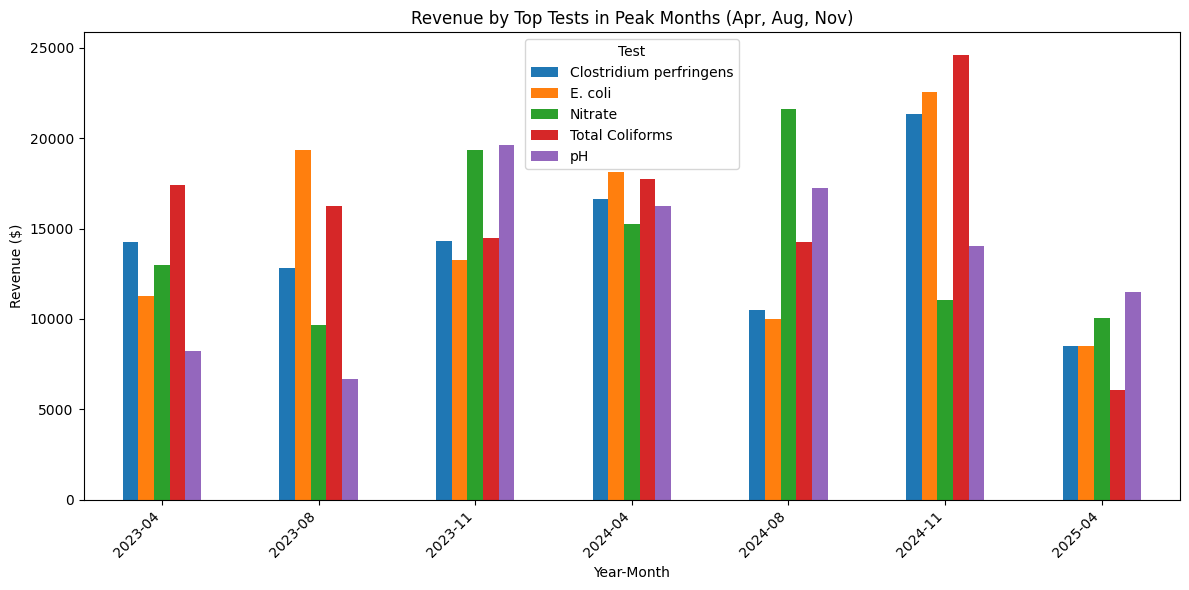

In [70]:
from IPython.display import display

# Step 1: Prepare data
df = revenue_filtered_complete.copy()
df['Year_Month'] = df['Final_CofA_Date_dt'].dt.to_period('M')

# Extract and split Test_Names
df_tests = df.dropna(subset=['Test_Names']).copy()
df_tests['Test_Names_List'] = df_tests['Test_Names'].str.split(',')
df_exploded = df_tests.explode('Test_Names_List')
df_exploded['Test_Names_List'] = df_exploded['Test_Names_List'].str.strip()

# Step 2: Aggregate Revenue by month and test
monthly_test_revenue = df_exploded.groupby(['Year_Month', 'Test_Names_List'])['Revenue'].sum().reset_index()

# Step 3: Identify top tests (overall)
top_tests = monthly_test_revenue.groupby('Test_Names_List')['Revenue'].sum().nlargest(5).index
print("\nTop 5 Tests by Total Revenue:")
print(top_tests)

# Step 4: Filter for peak months (Apr, Aug, Nov)
peak_months = monthly_test_revenue[monthly_test_revenue['Year_Month'].astype(str).str.contains('-04|-08|-11')]
peak_test_revenue = peak_months[peak_months['Test_Names_List'].isin(top_tests)]

# Display table
print("\nRevenue by Top Tests in Peak Months (Apr, Aug, Nov):")
display(peak_test_revenue.pivot_table(index='Year_Month', columns='Test_Names_List', values='Revenue', fill_value=0).round(2))

# Step 5: Plot
pivot_table = peak_test_revenue.pivot_table(index='Year_Month', columns='Test_Names_List', values='Revenue', fill_value=0)
pivot_table.plot(kind='bar', figsize=(12, 6))
plt.title('Revenue by Top Tests in Peak Months (Apr, Aug, Nov)')
plt.xlabel('Year-Month')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Test')
plt.tight_layout()
plt.savefig('bargroupedtop5TestsbyTotalRevenue.png',dpi=300)
plt.show()


# Save table
peak_test_revenue.to_csv('top_tests_peak_months.csv')

<div style="background-color:#c7cbe9; padding:10px;border:2px solid black;">
    
<h2>📈Forecasting</h2>   
</div>


Model 1: Revenue ~ Number_of_Tests
Coefficient: 192.56 $/test
Intercept: -959.50 $
R²: 0.932
RMSE: 2202.60 $

Model 2: Revenue ~ CofA_Count
Coefficient: 1245.87 $/CofA
Intercept: -6523.40 $
R²: 0.885
RMSE: 2869.62 $

Model 3: Revenue ~ Number_of_Tests + CofA_Count
Coefficients: Number_of_Tests = 137.81 $/test, CofA_Count = 387.79 $/CofA
Intercept: -3644.80 $
R²: 0.942
RMSE: 2027.56 $


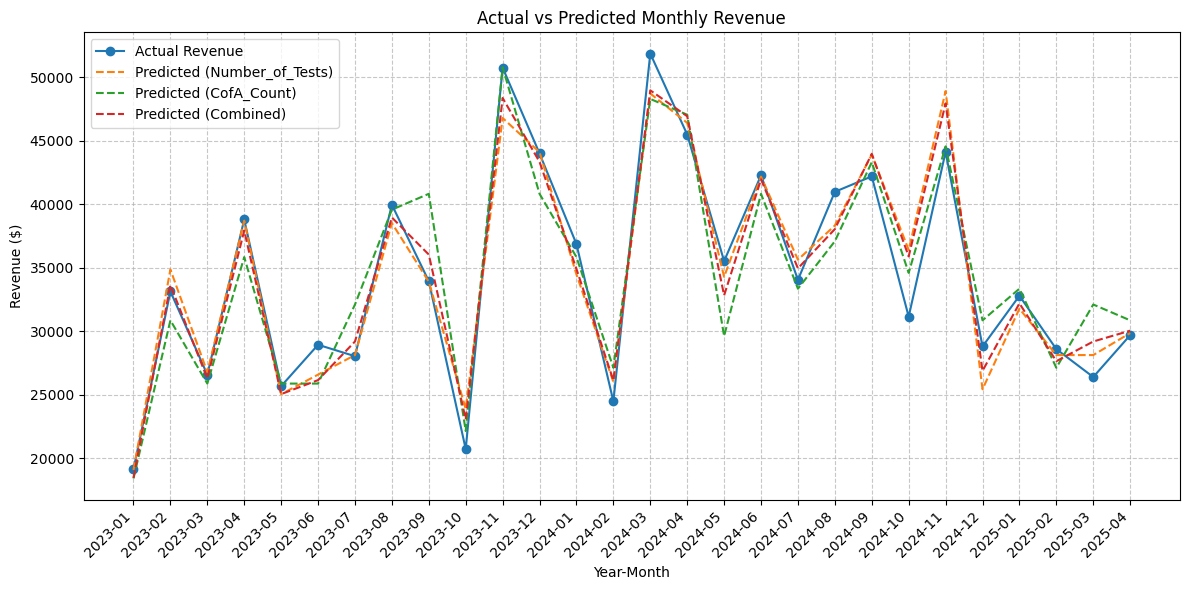

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Extract year-month from Final_CofA_Date
df = revenue_filtered_complete.copy()
df['Year_Month'] = df['Final_CofA_Date_dt'].dt.to_period('M')

# Exclude rows with NaN in Year_Month
df = df.dropna(subset=['Year_Month'])

# Aggregate data by month
monthly_data = df.groupby('Year_Month').agg({
    'Revenue': 'sum',
    'Number_of_Tests': 'sum',
    'Final_CofA_Date': 'count'  # Number of CofA (rows per month)
}).reset_index()
monthly_data = monthly_data.rename(columns={'Final_CofA_Date': 'CofA_Count'})
monthly_data['Year_Month'] = monthly_data['Year_Month'].astype(str)

# Prepare data for modeling
X_tests = monthly_data[['Number_of_Tests']].values
X_cofa = monthly_data[['CofA_Count']].values
X_combined = monthly_data[['Number_of_Tests', 'CofA_Count']].values
y = monthly_data['Revenue'].values

# Model 1: Revenue ~ Number_of_Tests
model_tests = LinearRegression()
model_tests.fit(X_tests, y)
y_pred_tests = model_tests.predict(X_tests)
r2_tests = r2_score(y, y_pred_tests)
rmse_tests = np.sqrt(mean_squared_error(y, y_pred_tests))

# Model 2: Revenue ~ CofA_Count
model_cofa = LinearRegression()
model_cofa.fit(X_cofa, y)
y_pred_cofa = model_cofa.predict(X_cofa)
r2_cofa = r2_score(y, y_pred_cofa)
rmse_cofa = np.sqrt(mean_squared_error(y, y_pred_cofa))

# Model 3: Revenue ~ Number_of_Tests + CofA_Count
model_combined = LinearRegression()
model_combined.fit(X_combined, y)
y_pred_combined = model_combined.predict(X_combined)
r2_combined = r2_score(y, y_pred_combined)
rmse_combined = np.sqrt(mean_squared_error(y, y_pred_combined))

# Print model performance
print("\nModel 1: Revenue ~ Number_of_Tests")
print(f"Coefficient: {model_tests.coef_[0]:.2f} $/test")
print(f"Intercept: {model_tests.intercept_:.2f} $")
print(f"R²: {r2_tests:.3f}")
print(f"RMSE: {rmse_tests:.2f} $")

print("\nModel 2: Revenue ~ CofA_Count")
print(f"Coefficient: {model_cofa.coef_[0]:.2f} $/CofA")
print(f"Intercept: {model_cofa.intercept_:.2f} $")
print(f"R²: {r2_cofa:.3f}")
print(f"RMSE: {rmse_cofa:.2f} $")

print("\nModel 3: Revenue ~ Number_of_Tests + CofA_Count")
print(f"Coefficients: Number_of_Tests = {model_combined.coef_[0]:.2f} $/test, CofA_Count = {model_combined.coef_[1]:.2f} $/CofA")
print(f"Intercept: {model_combined.intercept_:.2f} $")
print(f"R²: {r2_combined:.3f}")
print(f"RMSE: {rmse_combined:.2f} $")

# Plot actual vs predicted Revenue
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['Year_Month'], y, label='Actual Revenue', marker='o')
plt.plot(monthly_data['Year_Month'], y_pred_tests, label='Predicted (Number_of_Tests)', linestyle='--')
plt.plot(monthly_data['Year_Month'], y_pred_cofa, label='Predicted (CofA_Count)', linestyle='--')
plt.plot(monthly_data['Year_Month'], y_pred_combined, label='Predicted (Combined)', linestyle='--')
plt.title('Actual vs Predicted Monthly Revenue')
plt.xlabel('Year-Month')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.savefig('forecastmodelcombinelineaire.png',dpi=300)
plt.show()

In [72]:
# Forecast for next 3 months (example: Aug-Oct 2025)
# Assume average Number_of_Tests and CofA_Count from last 6 months
last_6_months = monthly_data.tail(6)
avg_tests = last_6_months['Number_of_Tests'].mean()
avg_cofa = last_6_months['CofA_Count'].mean()

future_months = ['2025-08', '2025-09', '2025-10']
future_X_tests = np.array([[avg_tests]] * 3)
future_X_cofa = np.array([[avg_cofa]] * 3)
future_X_combined = np.array([[avg_tests, avg_cofa]] * 3)

future_pred_tests = model_tests.predict(future_X_tests)
future_pred_cofa = model_cofa.predict(future_X_cofa)
future_pred_combined = model_combined.predict(future_X_combined)

# Display forecasts
print("\nForecast for Next 3 Months:")
forecast_df = pd.DataFrame({
    'Month': future_months,
    'Predicted_Revenue_Tests ($)': future_pred_tests.round(2),
    'Predicted_Revenue_CofA ($)': future_pred_cofa.round(2),
    'Predicted_Revenue_Combined ($)': future_pred_combined.round(2)
})
print(forecast_df)


Forecast for Next 3 Months:
     Month  Predicted_Revenue_Tests ($)  Predicted_Revenue_CofA ($)  \
0  2025-08                      32031.7                    33136.95   
1  2025-09                      32031.7                    33136.95   
2  2025-10                      32031.7                    33136.95   

   Predicted_Revenue_Combined ($)  
0                        32310.42  
1                        32310.42  
2                        32310.42  


Model static based on historical average on Number_of_Tests and CofA_Count, don't take into account of seasonality and peaks periods

DataFrame Size: (921, 12)
Last Month: 2025-04

Monthly Revenue Summary:
count       28.000000
mean     34456.981786
std       8609.077871
min      19103.240000
25%      28445.577500
50%      33533.950000
75%      41281.725000
max      51867.720000
Name: Revenue, dtype: float64

Last 5 Months:
   Year_Month   Revenue
23    2024-12  28792.62
24    2025-01  32788.49
25    2025-02  28584.89
26    2025-03  26386.13
27    2025-04  29684.49

Peak Months (Apr, Nov):
   Year_Month   Revenue
3     2023-04  38798.73
10    2023-11  50759.17
15    2024-04  45492.33
22    2024-11  44125.50
27    2025-04  29684.49


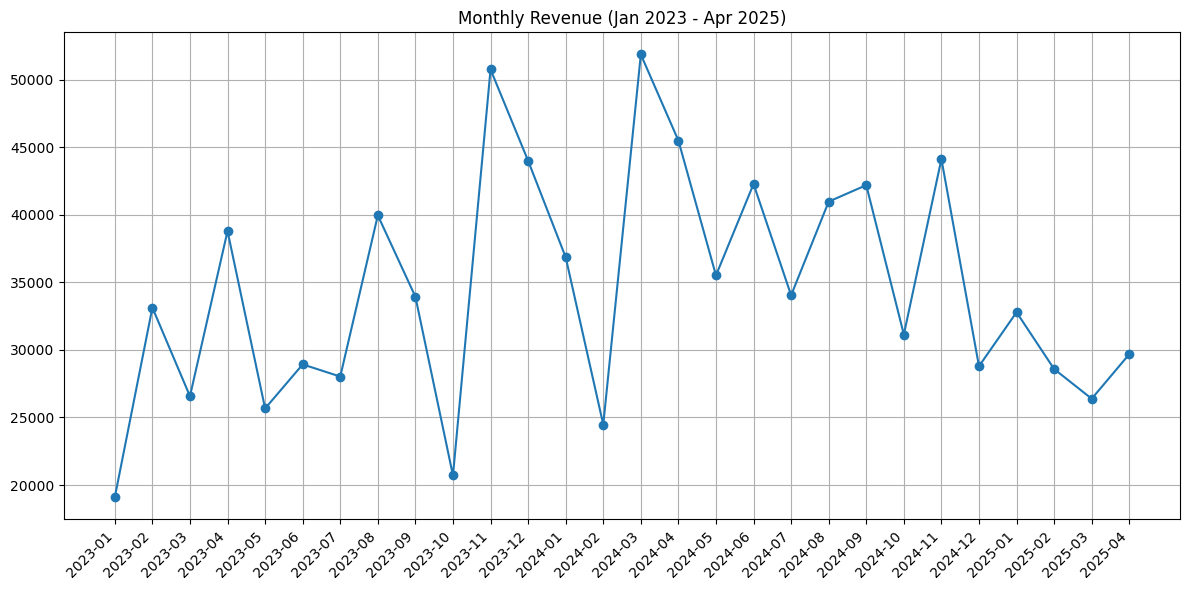


Testing SARIMA(1,1,1)(1,1,1,12)...


/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


RMSE: 11707.48 $
AIC: 329.75

Testing SARIMA(2,1,2)(1,1,1,12)...


/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RMSE: 11656.32 $
AIC: 332.75

Best Model: SARIMA(2,1,2)(1,1,1,12) (RMSE: 11656.32 $)

Forecast for Aug-Nov 2025:
      Month  Predicted_Revenue ($)  Lower_CI ($)  Upper_CI ($)
31  2025-08               24556.43      -3016.58      52129.43
32  2025-09               22284.94      -9537.54      54107.42
33  2025-10               14409.15     -21486.87      50305.17
34  2025-11               30184.64      -9306.77      69676.05


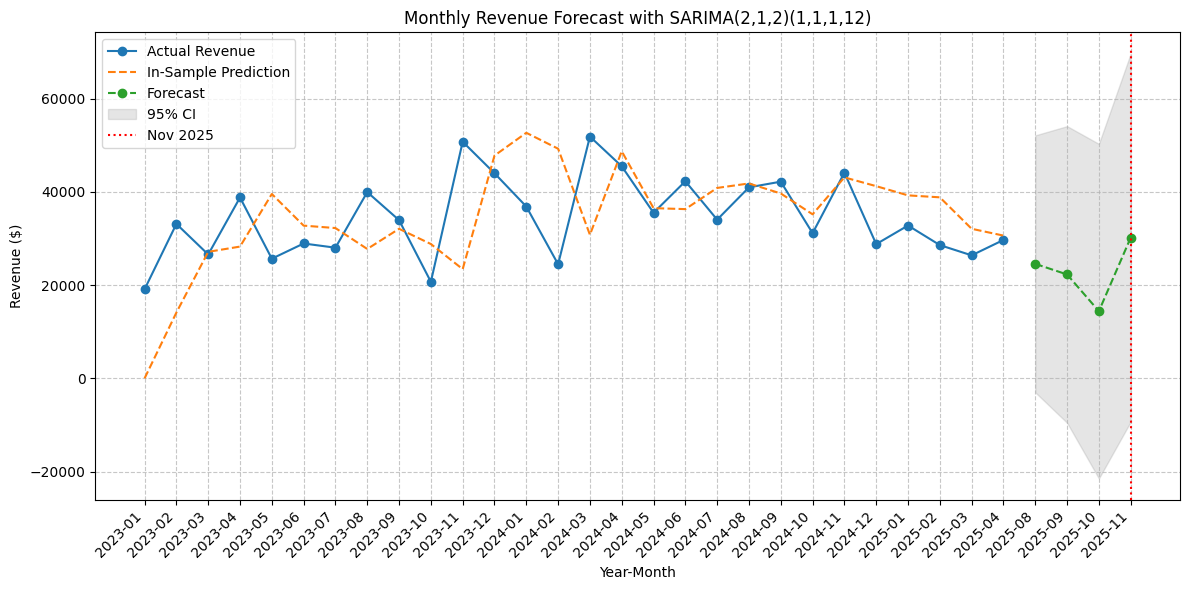

In [73]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Step 1: Verify data
df = revenue_filtered_complete.copy()
print(f"DataFrame Size: {df.shape}")
print(f"Last Month: {df['Final_CofA_Date_dt'].dt.to_period('M').max()}")

# Extract year-month
df['Year_Month'] = df['Final_CofA_Date_dt'].dt.to_period('M')

# Exclude NaN in Year_Month
df = df.dropna(subset=['Year_Month'])

# Aggregate Revenue by month
monthly_revenue = df.groupby('Year_Month')['Revenue'].sum().reset_index()
monthly_revenue['Year_Month'] = monthly_revenue['Year_Month'].astype(str)

# Verify data
print("\nMonthly Revenue Summary:")
print(monthly_revenue['Revenue'].describe())
print("\nLast 5 Months:")
print(monthly_revenue.tail(5)[['Year_Month', 'Revenue']])
print("\nPeak Months (Apr, Nov):")
print(monthly_revenue[monthly_revenue['Year_Month'].str.contains('-04|-11')])

# Plot initial series
plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue['Year_Month'], monthly_revenue['Revenue'], marker='o')
plt.title('Monthly Revenue (Jan 2023 - Apr 2025)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 2: Prepare time series
revenue_series = monthly_revenue['Revenue']
months = monthly_revenue['Year_Month']

# Step 3: Fit SARIMA (try two models)
models = [
    {'order': (1, 1, 1), 'seasonal_order': (1, 1, 1, 12), 'label': 'SARIMA(1,1,1)(1,1,1,12)'},
    {'order': (2, 1, 2), 'seasonal_order': (1, 1, 1, 12), 'label': 'SARIMA(2,1,2)(1,1,1,12)'}
]

best_rmse = float('inf')
best_model = None
best_fit = None
best_y_pred = None

for model_config in models:
    print(f"\nTesting {model_config['label']}...")
    try:
        model = ARIMA(revenue_series, order=model_config['order'], seasonal_order=model_config['seasonal_order'])
        fit = model.fit()
        y_pred = fit.predict(start=0, end=len(revenue_series)-1)
        rmse = np.sqrt(mean_squared_error(revenue_series, y_pred))
        print(f"RMSE: {rmse:.2f} $")
        print(f"AIC: {fit.aic:.2f}")
        if rmse < best_rmse:
            best_rmse = rmse
            best_model = model_config['label']
            best_fit = fit
            best_y_pred = y_pred
    except Exception as e:
        print(f"Error with {model_config['label']}: {e}")
        continue

# Use best model
print(f"\nBest Model: {best_model} (RMSE: {best_rmse:.2f} $)")

# Step 4: Forecast for Aug-Nov 2025
forecast = best_fit.get_forecast(steps=7)  # May-Nov, take last 4
forecast_mean = forecast.predicted_mean[-4:]  # Aug-Nov
forecast_ci = forecast.conf_int(alpha=0.05).iloc[-4:]

# Create forecast DataFrame
future_months = ['2025-08', '2025-09', '2025-10', '2025-11']
forecast_df = pd.DataFrame({
    'Month': future_months,
    'Predicted_Revenue ($)': forecast_mean.round(2),
    'Lower_CI ($)': forecast_ci.iloc[:, 0].round(2),
    'Upper_CI ($)': forecast_ci.iloc[:, 1].round(2)
})
print("\nForecast for Aug-Nov 2025:")
print(forecast_df)

# Step 5: Plot
plt.figure(figsize=(12, 6))
plt.plot(months, revenue_series, label='Actual Revenue', marker='o')
plt.plot(months, best_y_pred, label='In-Sample Prediction', linestyle='--')
plt.plot(future_months, forecast_mean, label='Forecast', marker='o', linestyle='--')
plt.fill_between(future_months, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='gray', alpha=0.2, label='95% CI')
plt.axvline(x='2025-11', color='red', linestyle=':', label='Nov 2025')
plt.title(f'Monthly Revenue Forecast with {best_model}')
plt.xlabel('Year-Month')
plt.ylabel('Revenue ($)')
plt.xticks(list(months) + future_months, rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.savefig('forecast.png',dpi=300)
plt.show()
# Save forecast
forecast_df.to_csv('sarima_forecast_november_2025.csv')

📁Prepare dataset for IBM Cognos Dashboard

In [74]:
df_tests = revenue_filtered_complete.dropna(subset=['Test_Names']).copy()

# Split and explode Test_Names
df_tests['Test_Names_List'] = df_tests['Test_Names'].str.split(',')
df_exploded = df_tests.explode('Test_Names_List')
df_exploded['Test_Names_List'] = df_exploded['Test_Names_List'].str.strip()
df_exploded.to_csv('environmental_dataset_for_Cognos.csv')

In [75]:
from IPython.display import display

# Step 1: Prepare data
df = revenue_filtered_complete.copy()
print(f"Original DataFrame Size: {df.shape}")
print(f"NaN in Test_Names: {df['Test_Names'].isna().sum()}")

# Step 2: Drop NaN in Test_Names and create a copy
df_tests = df.dropna(subset=['Test_Names']).copy()
print(f"DataFrame Size after dropping NaN: {df_tests.shape}")

# Step 3: Split and explode Test_Names
df_tests['Test_Names_List'] = df_tests['Test_Names'].str.split(',')
df_exploded = df_tests.explode('Test_Names_List')
df_exploded['Test_Names_List'] = df_exploded['Test_Names_List'].str.strip()

# Step 4: Verify exploded data
print(f"Exploded DataFrame Size: {df_exploded.shape}")
print("\nSample of Exploded Data (first 5 rows):")
display(df_exploded[['Year_Month', 'Test_Names_List', 'Revenue', 'Number_of_Tests', 'Final_CofA_Date_dt']].head())

# Step 5: Check for empty or invalid Test_Names_List
print(f"Empty Test_Names_List: {df_exploded['Test_Names_List'].str.strip().eq('').sum()}")
print(f"Unique Test Names: {df_exploded['Test_Names_List'].nunique()}")
print("\nTop 5 Test Names:")
print(df_exploded['Test_Names_List'].value_counts().head())

# Step 6: Format Final_CofA_Date_dt for Cognos (YYYY-MM-DD)
df_exploded['Final_CofA_Date'] = df_exploded['Final_CofA_Date_dt'].dt.strftime('%Y-%m-%d')

# Step 7: Rename columns for clarity (remove spaces, special characters)
df_exploded = df_exploded.rename(columns={
    'Test_Names_List': 'Test_Name',
    'Number_of_Tests': 'Test_Count',
    'Final_CofA_Date_dt': 'CofA_Date_Datetime'
})

# Step 8: Save to CSV
output_file = 'environmental_dataset_for_Cognos.csv'
df_exploded.to_csv(output_file, index=False, encoding='utf-8')
print(f"\nDataset saved as: {output_file}")
print(f"Columns in CSV: {list(df_exploded.columns)}")

Original DataFrame Size: (921, 12)
NaN in Test_Names: 56
DataFrame Size after dropping NaN: (865, 12)
Exploded DataFrame Size: (4836, 13)

Sample of Exploded Data (first 5 rows):


,Year_Month,Test_Names_List,Revenue,Number_of_Tests,Final_CofA_Date_dt
0,2024-02,Heavy Metals,316.97,2,2024-02-03
0,2024-02,Turbidity,316.97,2,2024-02-03
1,2024-11,Total Coliforms,729.00,4,2024-11-04
1,2024-11,Cryptosporidium,729.00,4,2024-11-04
1,2024-11,Giardia,729.00,4,2024-11-04


Empty Test_Names_List: 0
Unique Test Names: 20

Top 5 Test Names:
Test_Names_List
Nitrate                    264
Total Coliforms            257
E. coli                    256
Clostridium perfringens    254
Fecal Streptococci         251
Name: count, dtype: int64

Dataset saved as: environmental_dataset_for_Cognos.csv
Columns in CSV: ['Request_ID', 'Sample_Received_Date', 'Test_Count', 'Test_Type', 'Test_Names', 'Final_CofA_Date', 'Revenue', 'Sample_Received_Date_dt', 'CofA_Date_Datetime', 'Turn_Around_Time', 'Revenue_log', 'Year_Month', 'Test_Name']


<div style="background-color:#c7cbe9; padding:10px;border:2px solid black;">
    
<h2>🎭Storytelling</h2>   
</div>

<div style="padding:10px;border:2px solid black;">
See Report
</div>

<div style="background-color:#c7cbe9; padding:10px;border:2px solid black;">
    
<h2>🎭Results & Final Insights</h2>   
</div>

The results of this project are presented through two key deliverables: **a dynamic IBM Cognos dashboard** (exported as a PDF due to platform limitations) and a **comprehensive report** edited via **Canva**.

📊 **Dashboard (IBM Cognos - PDF Format)**: This interactive visualization has been exported as a static PDF, allowing users to explore key operational metrics, such as turnaround time, revenue trends, and test distribution. While the interactive experience is limited, the dashboard provides clear insights into efficiency, data inconsistencies, and performance optimization. Access it here: [Dashboard PDF](https://github.com/MagaliTrueAnalytics/Portfolio/blob/main/Projet3/Report/AquaMetrics_Dashboard.pdf).

📄 **Final Report (Canva)**: A structured document summarizing the methodology, findings, and actionable takeaways. It highlights data cleaning efforts, trend analysis, and strategic insights for improving laboratory operations. View the full report here: [Final Report](https://github.com/MagaliTrueAnalytics/Portfolio/blob/main/Projet3/Report/AquaMetrics_Report.pdf).

Both resources offer a data-driven narrative, helping to assess operational efficiency, revenue patterns, and analytical challenges, making this dataset a **valuable tool for decision-making and optimization in environmental testing services**.📊🚰